<a href="https://colab.research.google.com/github/Eminazh/yandex/blob/main/HH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Анализ Базы вакансий**

**2. Цель проекта**

Выявить различия в предлагаемых вакансиях дял Аналитиков данных и Бизнес аналитиков

**3. Описание данных**
Содержимое таблиц vacancies_da и vacancies_ba представляет собой данные о вакансиях для Аналитиков данных и Бизнес-аналитиков с сайта HH.ru.

- id: уникальный идентификатор каждой вакансии.
- name: название вакансии.
- published_at: дата и время публикации вакансии.
- alternate_url: ссылка на вакансию.
- type: тип вакансии.
- employer: название компании или работодателя, который разместил вакансию.
- department: отдел или подразделение компании, которое предлагает данную вакансию.
- area: сфера деятельности, к которой относится вакансия.
- experience: требуемый уровень опыта работы для кандидатов.
- key_skills: ключевые навыки.
- schedule: график работы.
- employment: тип занятости.
- description: описание вакансии.
- description_lemmatized: описание вакансии, преобразованное в лемматизированную форму.
- salary_from: минимальная предлагаемая зарплата для данной вакансии.
- salary_to: максимальная предлагаемая зарплата для данной вакансии.
- salary_bin: зарплатный диапазон.
- key_skills_from_key_skills_field: ключевые навыки.
- hard_skills_from_description: Это "жесткие" навыки.
- soft_skills_from_description: Это "мягкие" навыки.

**4. План исследования**

1. Загрузка таблиц
2. Предобработка данных
3. Исследовательский анализ данных
4. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Бизнес-аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils, опыт работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
5. Определение типичного места работы для Аналитика данных и Бизнес-аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
6. Формулирование выводов и рекомендаций.
7. Создание презентации.


**5. Ожидаемый итог**
1. Описание “идеальных кандидатов” на должности Аналитик данных и Бизнес-аналитик для различных грейдов.
2. Определение типичного места работы для Аналитика данных и Бизнес-аналитика.
3. Расчет помесячной динамики количества вакансий для Аналитика данных и Бизнес-аналитика. Для различных грейдов.


**4.1 Загрузим библиотеки и откроем таблицы**

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [131]:
from google.colab import files

# Загрузка файла vacancies_da.xlsx
uploaded_da = files.upload()

# Загрузка файла vacancies_ba.xlsx
uploaded_ba = files.upload()



Saving vacancies_da.xlsx to vacancies_da (2).xlsx


Saving vacancies_ba.xlsx to vacancies_ba (2).xlsx


In [132]:
# Загрузка данных из vacancies_da.xlsx
df_da = pd.read_excel(next(iter(uploaded_da.keys())), engine='openpyxl')

# Загрузка данных из vacancies_ba.xlsx
df_ba = pd.read_excel(next(iter(uploaded_ba.keys())), engine='openpyxl')

In [133]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                417 non-null    int64         
 1   name                              417 non-null    object        
 2   published_at                      417 non-null    datetime64[ns]
 3   alternate_url                     417 non-null    object        
 4   type                              417 non-null    object        
 5   employer                          417 non-null    object        
 6   department                        137 non-null    object        
 7   area                              417 non-null    object        
 8   experience                        417 non-null    object        
 9   key_skills                        417 non-null    object        
 10  schedule                          417 non-null    

In [134]:
df_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1011 non-null   int64         
 1   name                              1011 non-null   object        
 2   published_at                      1011 non-null   datetime64[ns]
 3   alternate_url                     1011 non-null   object        
 4   type                              1011 non-null   object        
 5   employer                          1011 non-null   object        
 6   department                        210 non-null    object        
 7   area                              1011 non-null   object        
 8   experience                        1011 non-null   object        
 9   key_skills                        1011 non-null   object        
 10  schedule                          1011 non-null 

In [135]:
display(df_da.head(10))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,https://hh.ru/vacancy/77320677,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),"['Бизнес-анализ', 'Анализ бизнес показателей',...",Полный день,Полная занятость,на масштабный проект по созданию единого корпо...,масштабный проект создание единый корпоративны...,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",NaN,Документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,https://hh.ru/vacancy/77963716,Открытая,Яковлев,NaN,Москва,Junior+ (1-3 years),"['Apache, PHP, MySQL', 'Ethernet IEEE 802.3', ...",Полный день,Полная занятость,системный аналитик (инф. взаимодействие между ...,системный аналитик инф взаимодействие абонент ...,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",NaN,NaN
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,https://hh.ru/vacancy/79889558,Открытая,МТС,"«МТС», Digital",Москва,Junior+ (1-3 years),"['Data Catalog', 'Data Governance', 'DMBOK DAM...",Полный день,Полная занятость,мтс – это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,NaN,NaN,ЗП не указана,"Data Catalog, DMBOK DAMA, Business Glossary, D...",NaN,NaN
3,82901165,DATA-аналитик,2024-03-25 10:33:57,https://hh.ru/vacancy/82901165,Открытая,ЭлРос,NaN,Владимир,Junior+ (1-3 years),"['Spark', 'Data Analysis', 'Теория вероятносте...",Полный день,Полная занятость,наши преимущества: аккредитованная ит-компан...,наш преимущество аккредитовать ита компания си...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Spark,...",NaN,NaN
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,https://hh.ru/vacancy/85598149,Открытая,EVYAP International Russia,NaN,Москва,Junior+ (1-3 years),"['MS Access', 'Управление проектами', 'Olap (o...",Полный день,Полная занятость,"evyap rus – международная fmcg компания, произ...",evyap rus международный fmcg компания производ...,NaN,NaN,ЗП не указана,"Business Intelligence Systems, MS Excel, MS Ac...",NaN,Документация
5,86212079,Аналитик данных BI отдела автоматизации (гибри...,2024-03-29 16:50:53,https://hh.ru/vacancy/86212079,Открытая,Группа компаний АГРОЭКО,NaN,Воронеж,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,вакансия открыта в связи с расширением отдела ...,вакансия открывать связь расширение отдел авто...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
6,87643118,Junior Data Engineer/ BI Аналитик (Дашборды),2024-03-20 14:11:06,https://hh.ru/vacancy/87643118,Открытая,ГБУЗ «Научно-практический клинический центр ди...,NaN,Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Английский язык', ...",Полный день,Полная занятость,обязанности построение и оптимизация etl скри...,обязанность построение оптимизация etl скрипт ...,100000.0,NaN,ЗП не указана,"Английский язык, Научные исследования, Базы да...",NaN,NaN
7,87684971,Аналитик данных,2024-03-18 08:23:07,https://hh.ru/vacancy/87684971,Открытая,Кадровый Центр Департамента здравоохранения го...,NaN,Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'MS Excel', 'MS Pow...",Полный день,Полная занятость,обязанности: анализ данных по заданным критер...,обязанность анализ данные заданный критерий по...,100000.0,NaN,ЗП не указана,"MS Excel, Аналитика, MS PowerPoint, Анализ дан...",NaN,NaN
8,88605313,Data Analyst,2024-03-12 21:40:27,https://hh.ru/vacancy/88605313,Открытая,Бланк – банк для бизнеса,NaN,Москва,Junior+ (1-3 years),"['Power BI', 'PowerBI', 'Tableau', 'PostgreSQL...",Удаленная работа,Полная занятость,"привет!мы – бланк, современный life-first моби...",привет бланк современный life first мобильный ...,NaN,NaN,ЗП не у

In [136]:
display(df_ba.head(10))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
5,81922976,Бизнес-аналитик,2024-03-18 09:40:17,https://hh.ru/vacancy/81922976,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
6,82834025,Бизнес-аналитик (мобильное приложение),2024-03-21 13:57:30,https://hh.ru/vacancy/82834025,Открытая,Комус,NaN,Москва,Junior+ (1-3 years),"['Бизнес-анализ', 'В2В', 'E-Commerce', 'Докуме...",Гибкий график,Полная занятость,«комус» - это 14 000 сотрудников по всей росси...,комус 14 сотрудник весь россия лидер среди e c...,NaN,NaN,ЗП не указана,"Бизнес-анализ, Оптимизация бизнес-процессов, E...",NaN,Документация
7,83231980,Бизнес-аналитик кредитного процесса,2024-03-18 07:10:55,https://hh.ru/vacancy/83231980,Открытая,Московский Кредитный Банк,Московский Кредитный Банк. Профессионалы,Москва,Middle (3-6 years),"['Бизнес-анализ', 'Деловая коммуникация', 'Авт...",Полный день,Полная занятость,обязанности: взаимодействие с подразделениями...,обязанность взаимодействие подразделение банка...,NaN,NaN,ЗП не указана,"Бизнес-анализ, Оптимизация бизнес-процессов, Д...",NaN,NaN
8,84685913,Бизнес-аналитик (Middle),2024-03-25 12:05:02,https://hh.ru/vacancy/84685913,Открытая,Совкомбанк,NaN,Казань,Junior+ (1-3 years),"['Документация', 'CRM', 'Коммуникация']",Полный день,Полная занятость,хочешь все и сразу: хорошую зарплату уже на ст...,хотеть весь сразу хороший зарплата старт стаби...,NaN,NaN,ЗП не указана,CRM,NaN,"Коммуникация, Документация"
9,85100161,Бизнес-аналитик (Операционный департамент),2024-03-27 2

Вывод:

- Количество записей в таблице df_da: 1011.
- Количество записей в таблице df_ba: 417
- Структура данных: Обе таблицы содержат одинаковое количество столбцов с одинаковыми названиями. Это позволяет легко сравнивать данные между таблицами и выполнять с ними анализ.
- Пропущенные значения: Обе таблицы содержат пропущенные значения в различных столбцах. Это может потребовать дополнительной обработки данных, такой как заполнение пропущенных значений или исключение соответствующих записей из анализа.


**4.2 Предобработка данных**

In [137]:
missing_values_da = df_da.isnull().sum()
print("Пропущенные значения в каждом столбце таблицы df_da:")
print(missing_values_da)

Пропущенные значения в каждом столбце таблицы df_da:
id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          280
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         360
salary_to                           387
salary_bin                            0
key_skills_from_key_skills_field    180
hard_skills_from_description        326
soft_skills_from_description        282
dtype: int64


In [138]:
missing_values_da = df_ba.isnull().sum()
print("Пропущенные значения в каждом столбце таблицы df_da:")
print(missing_values_da)

Пропущенные значения в каждом столбце таблицы df_da:
id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          801
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         839
salary_to                           879
salary_bin                            0
key_skills_from_key_skills_field    445
hard_skills_from_description        844
soft_skills_from_description        393
dtype: int64


- Навыки:
Пропущенные значения можно заполнить значением "Не указано", чтобы сохранить информацию о том, что навыки не были указаны в объявлении о вакансии.
- Зарплата:
Можно заполнить пропущенные значения на NaN.
Этот подход позволяет сохранить ценные данные и минимизировать искажение результатов анализа.
- Отдел:
Пропущенные значения можно заполнить значением "Не указано", чтобы сохранить информацию о том, что отделы не были указаны в объявлении о вакансии.

In [139]:
# Заполнение пропущенных значений в столбце 'key_skills_from_key_skills_field' для таблицы df_da
df_da['key_skills_from_key_skills_field'].fillna('Отсутствует', inplace=True)

# Заполнение пропущенных значений в столбце 'key_skills_from_key_skills_field' для таблицы df_ba
df_ba['key_skills_from_key_skills_field'].fillna('Отсутствует', inplace=True)

# Заполнение пропущенных значений в столбце 'hard_skills_from_description' для таблицы df_da
df_da['hard_skills_from_description'].fillna('Не указано', inplace=True)

# Заполнение пропущенных значений в столбце 'soft_skills_from_description' для таблицы df_da
df_da['soft_skills_from_description'].fillna('Отсутствует', inplace=True)

# Заполнение пропущенных значений в столбце 'hard_skills_from_description' для таблицы df_ba
df_ba['hard_skills_from_description'].fillna('Не указано', inplace=True)

# Заполнение пропущенных значений в столбце 'soft_skills_from_description' для таблицы df_ba
df_ba['soft_skills_from_description'].fillna('Отсутствует', inplace=True)

Заменим пропущенные значения в столбцац зарплат на NaN

In [140]:
# Замена пропущенных значений на NaN
df_da['salary_from'].fillna(np.nan, inplace=True)
df_da['salary_to'].fillna(np.nan, inplace=True)
df_ba['salary_from'].fillna(np.nan, inplace=True)
df_ba['salary_to'].fillna(np.nan, inplace=True)

In [141]:
df_da['department'].fillna('Не указано', inplace=True)
df_ba['department'].fillna('Не указано', inplace=True)

In [142]:
missing_values_da = df_da.isnull().sum()
print("Пропущенные значения в каждом столбце таблицы df_da:")
print(missing_values_da)

missing_values_da = df_ba.isnull().sum()
print("Пропущенные значения в каждом столбце таблицы df_da:")
print(missing_values_da)


Пропущенные значения в каждом столбце таблицы df_da:
id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                            0
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         360
salary_to                           387
salary_bin                            0
key_skills_from_key_skills_field      0
hard_skills_from_description          0
soft_skills_from_description          0
dtype: int64
Пропущенные значения в каждом столбце таблицы df_da:
id                                    0
name                                  0
p

In [143]:
# Проверка наличия дубликатов в обеих таблицах
duplicates_da = df_da.duplicated().sum()
duplicates_ba = df_ba.duplicated().sum()

print("Количество дубликатов в таблице df_da:", duplicates_da)
print("Количество дубликатов в таблице df_ba:", duplicates_ba)

Количество дубликатов в таблице df_da: 0
Количество дубликатов в таблице df_ba: 0


In [144]:
# Вывод текущих типов данных для каждой таблицы
print("Типы данных для таблицы df_da:")
print(df_da.dtypes)
print("\nТипы данных для таблицы df_ba:")
print(df_ba.dtypes)


Типы данных для таблицы df_da:
id                                           int64
name                                        object
published_at                        datetime64[ns]
alternate_url                               object
type                                        object
employer                                    object
department                                  object
area                                        object
experience                                  object
key_skills                                  object
schedule                                    object
employment                                  object
description                                 object
description_lemmatized                      object
salary_from                                float64
salary_to                                  float64
salary_bin                                  object
key_skills_from_key_skills_field            object
hard_skills_from_description                object


Преобразуем столбцы 'type', 'area', 'experience', 'employment' и 'schedule' в категориальные типы данных для более эффективного управления и анализа качественных переменных в таблицах.

In [145]:
# Преобразование столбцов в категориальные типы данных
categorical_columns = ['type', 'area', 'experience', 'employment', 'schedule']
df_da[categorical_columns] = df_da[categorical_columns].astype('category')
df_ba[categorical_columns] = df_ba[categorical_columns].astype('category')

Вывод:
1. Навыки:
Пропущенные значения заполнили значением "Не указано", чтобы сохранить информацию о том, что навыки не были указаны в объявлении о вакансии.
2. Зарплата:
Заполнили пропущенные значения в столбцах 'salary_from' и 'salary_to' на NaN. Применили этот подход к обоим таблицам.
3. Отдел:
Заполнили пропущенные значения в столюце 'department' значением "Не указано".
Применили этот подход к обоим таблицам.
4. Преобразование категориальных столбцов:
Преобразовали столбцы 'type', 'area', 'experience', 'employment' и 'schedule' в категориальные типы данных для обеих таблиц.

**3. Исследовательский анализ данных**

Рассчитаем распределение минимальных и максимальных зарплат Аналитиков данных и Бизнес аналитиков

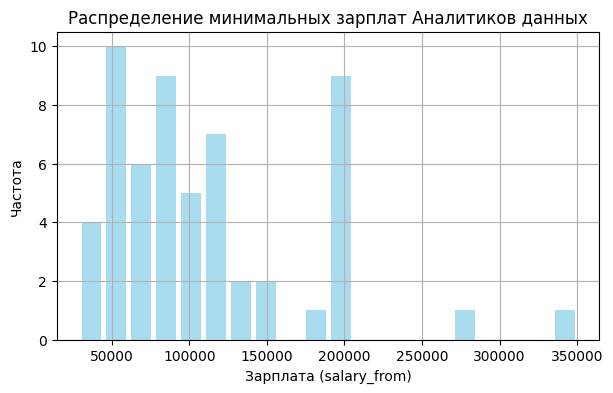

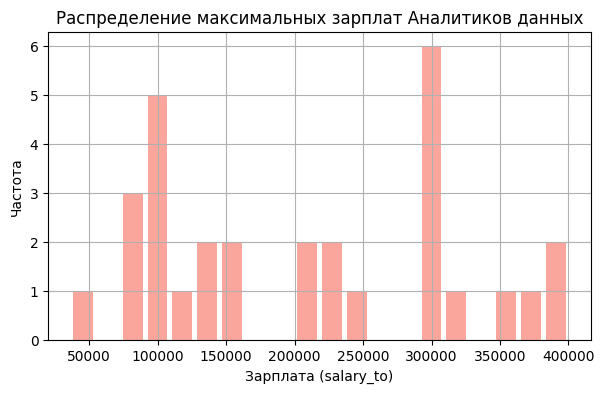

In [146]:
# Гистограмма для столбца 'salary_from'
plt.figure(figsize=(7, 4))
plt.hist(df_da['salary_from'].dropna(), bins=20, color='skyblue', alpha=0.7, rwidth=0.8)
plt.xlabel('Зарплата (salary_from)')
plt.ylabel('Частота')
plt.title('Распределение минимальных зарплат Аналитиков данных')
plt.grid(True)
plt.show()

# Гистограмма для столбца 'salary_to'
plt.figure(figsize=(7, 4))
plt.hist(df_da['salary_to'].dropna(), bins=20, color='salmon', alpha=0.7, rwidth=0.8)
plt.xlabel('Зарплата (salary_to)')
plt.ylabel('Частота')
plt.title('Распределение максимальных зарплат Аналитиков данных')
plt.grid(True)
plt.show()

In [147]:
# Создание DataFrame для зарплаты из таблицы df_da
salary_data_da = df_da[['salary_from', 'salary_to']].describe()
salary_data_da

,salary_from,salary_to
count,57.000000,30.000000
mean,111544.473684,206959.000000
std,64616.088828,109378.968652
min,28940.000000,36175.000000
25%,70000.000000,100000.000000
50%,90000.000000,200000.000000
75%,137000.000000,300000.000000
max,350000.000000,400000.000000


Для вакансий Аналитик данных(DA):
- Средняя начальная зарплата составляет примерно 103258 тысяч, средняя максимальная - примерно 151778 тысяч.
- Минимальные значения начальной и максимальной зарплат составляют составляют 30 тысяч и 40 тысяч соответственно, в то время как максимальные зарплаты достигают 327.25 тысяч для начальной и 467.5 тысяч для максимальной.
- Максимальные значения начальной и максимальной зарплат составляют 327.25 тысяч
и и 467.5 тысяч соответственно.
- Значения квартилей (25%, 50%, 75%) для обоих столбцов имеют одинаковые значения, что может свидетельствовать о том, что большинство значений находятся в диапазоне от 100 до 150 тысяч.

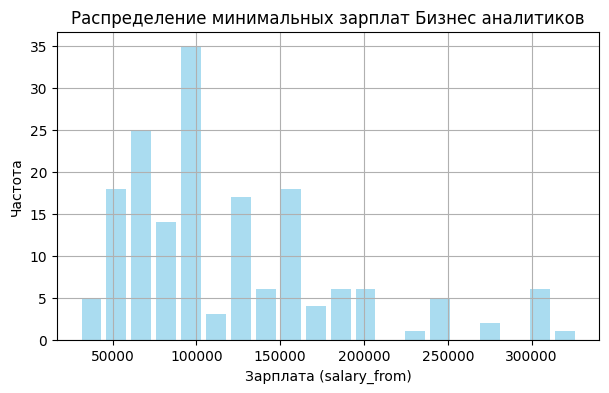

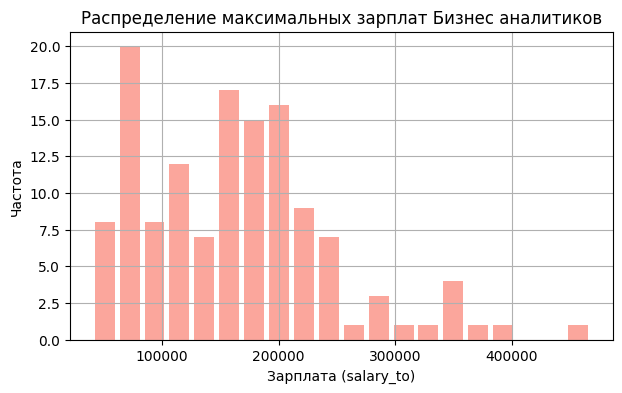

In [148]:
# Гистограмма для столбца 'salary_from' в df_ba
plt.figure(figsize=(7, 4))
plt.hist(df_ba['salary_from'].dropna(), bins=20, color='skyblue', alpha=0.7, rwidth=0.8)
plt.xlabel('Зарплата (salary_from)')
plt.ylabel('Частота')
plt.title('Распределение минимальных зарплат Бизнес аналитиков')
plt.grid(True)
plt.show()

# Гистограмма для столбца 'salary_to' в df_ba
plt.figure(figsize=(7, 4))
plt.hist(df_ba['salary_to'].dropna(), bins=20, color='salmon', alpha=0.7, rwidth=0.8)
plt.xlabel('Зарплата (salary_to)')
plt.ylabel('Частота')
plt.title('Распределение максимальных зарплат Бизнес аналитиков')
plt.grid(True)
plt.show()

In [149]:
salary_data_ba = df_ba[['salary_from', 'salary_to']].describe()
salary_data_ba

,salary_from,salary_to
count,172.000000,132.000000
mean,119151.348837,163620.371212
std,64347.693476,81081.961500
min,30000.000000,40000.000000
25%,70000.000000,100000.000000
50%,100000.000000,150000.000000
75%,150000.000000,200000.000000
max,327250.000000,467500.000000


Для вакансий Бизнес-аналитика (BA):

- Средняя начальная зарплата составляет примерно 92944.93 тыс. руб.,  средняя максимальная - примерно 200500.65 тыс. руб.
- Минимальные значения начальной и максимальной зарплат составляют 28940 и 36175 тыс. руб. соответственно.
- Максимальные значения начальной и максимальной зарплат составляют 350000 и 400000 тыс. руб. соответственно.
- Исходя из этой информации, можно сделать вывод о том, что в среднем зарплата для вакансий Бизнес-аналитика (BA) выше, чем для вакансий Аналитика данных (DA). Однако разброс зарплаты также выше, что может указывать на большую вариабельность предложений по зарплате в данной категории вакансий.

**Расчитаем средние зарплаты по регионам для Аналитиков данных и Бизнес аналитиков:**

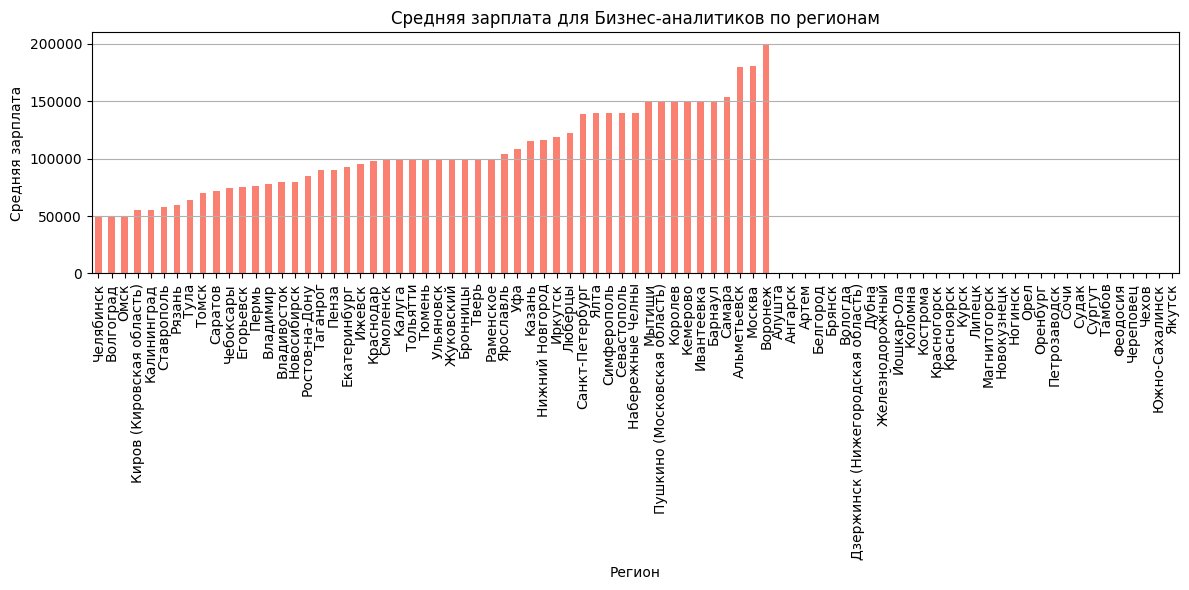

In [150]:
# Сгруппируем данные по регионам и рассчитаем средние зарплаты для Бизнес-аналитика
mean_salary_by_region_ba = df_ba.groupby('area')[['salary_from', 'salary_to']].mean().mean(axis=1)

# Отсортируем данные по средней зарплате в порядке возрастания
mean_salary_by_region_ba_sorted = mean_salary_by_region_ba.sort_values()

# Построим столбчатую диаграмму для средних зарплат по регионам для должности Бизнес-аналитика
plt.figure(figsize=(12, 6))
mean_salary_by_region_ba_sorted.plot(kind='bar', color='salmon')
plt.title('Средняя зарплата для Бизнес-аналитиков по регионам')
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Уберем города, где зарплаты не указаны

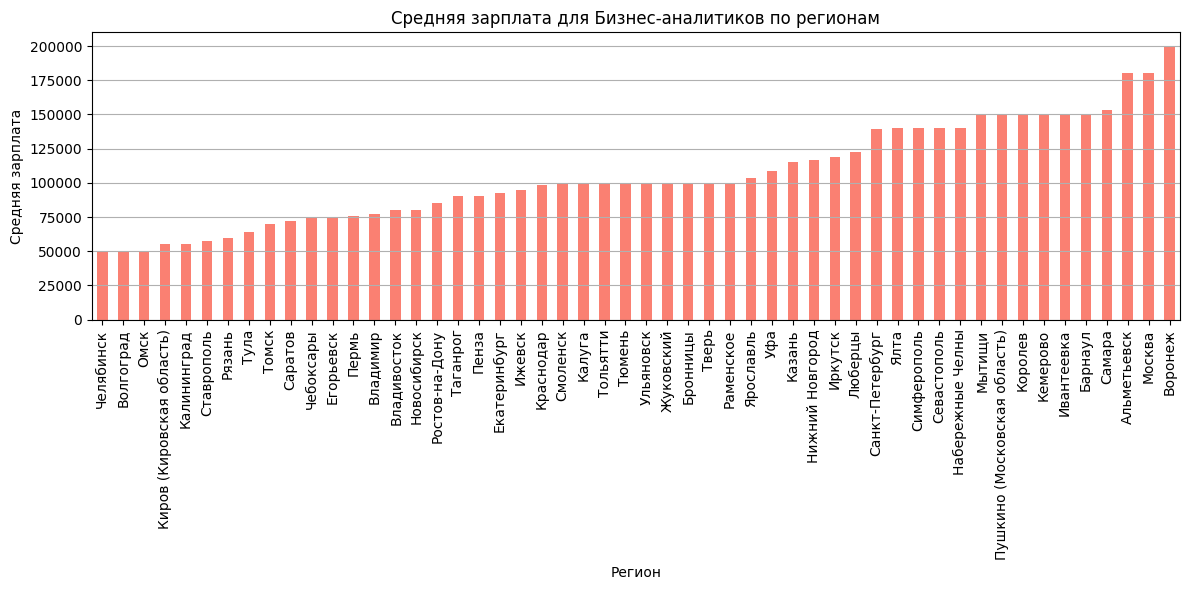

In [151]:
# Убираем города с отсутствующими значениями
mean_salary_by_region_ba_sorted = mean_salary_by_region_ba.dropna().sort_values()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
mean_salary_by_region_ba_sorted.plot(kind='bar', color='salmon')
plt.title('Средняя зарплата для Бизнес-аналитиков по регионам')
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()





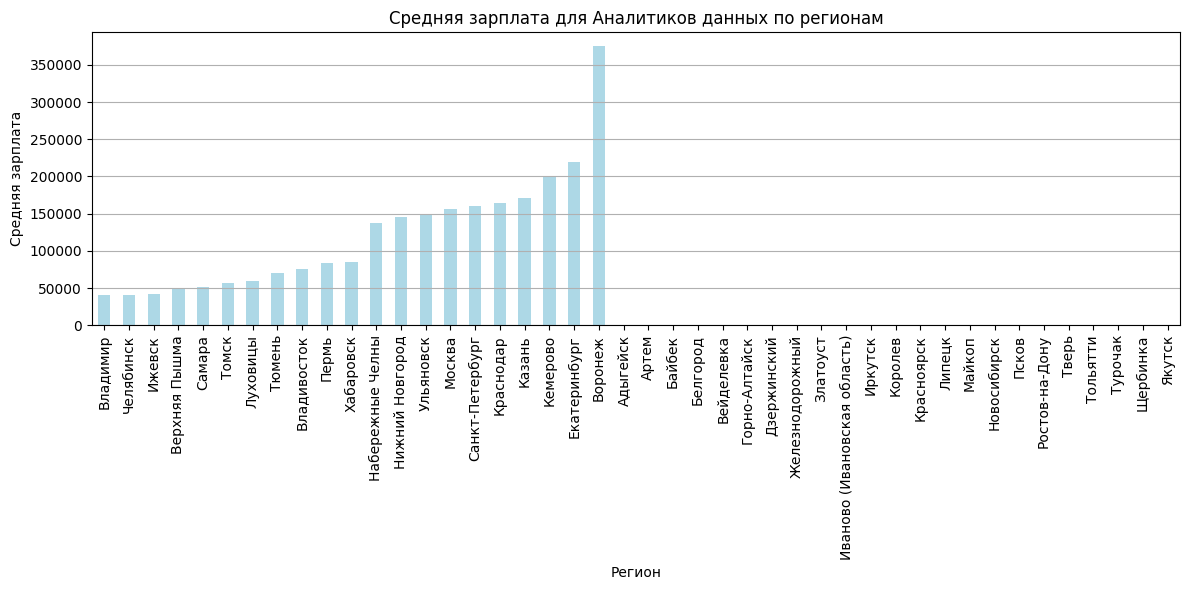

In [152]:
# Сгруппируем данные по регионам и рассчитаем средние зарплаты для Аналитика данных
mean_salary_by_region_da = df_da.groupby('area')[['salary_from', 'salary_to']].mean().mean(axis=1)

# Отсортируем данные по средней зарплате в порядке возрастания
mean_salary_by_region_da_sorted = mean_salary_by_region_da.sort_values()

# Построим столбчатую диаграмму для средних зарплат по регионам для должности Аналитика данных
plt.figure(figsize=(12, 6))
mean_salary_by_region_da_sorted.plot(kind='bar', color='lightblue')
plt.title('Средняя зарплата для Аналитиков данных по регионам')
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



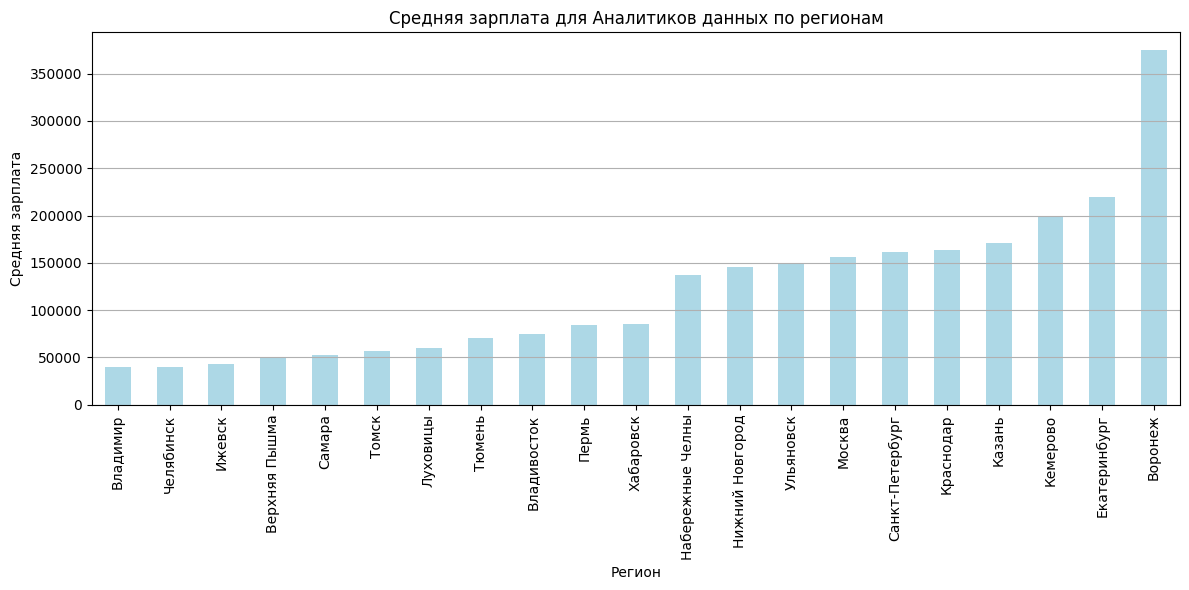

In [153]:
# Убираем города с отсутствующими значениями
mean_salary_by_region_da_sorted = mean_salary_by_region_da.dropna().sort_values()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
mean_salary_by_region_da_sorted.plot(kind='bar', color='lightblue')
plt.title('Средняя зарплата для Аналитиков данных по регионам')
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


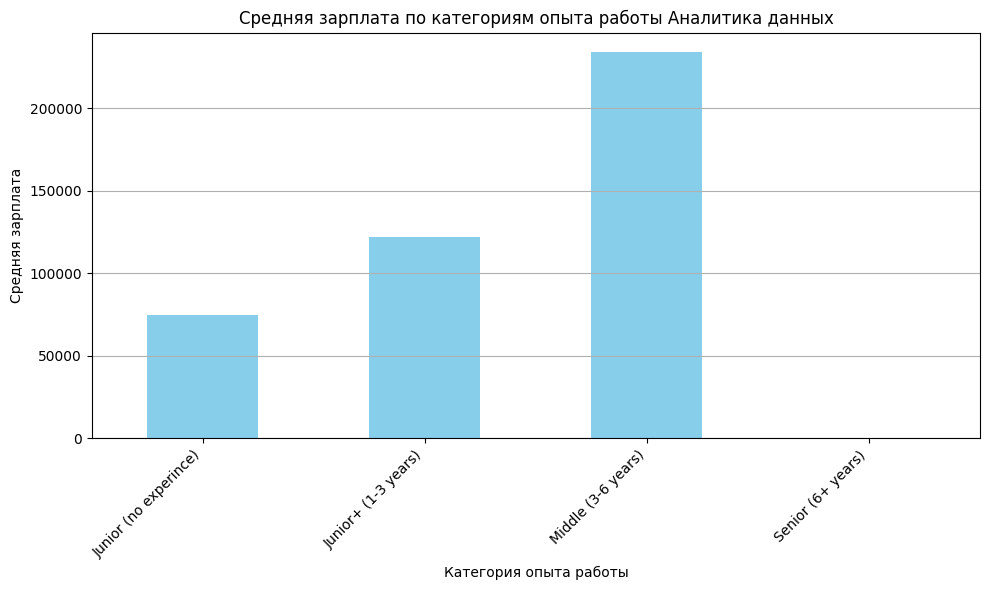

In [154]:
# Создадим функцию для определения категории опыта работы
def categorize_experience(experience):
    if 'junior' in experience.lower() and 'no' not in experience.lower():
        return 'Junior+ (1-3 years)'
    elif 'middle' in experience.lower():
        return 'Middle (3-6 years)'
    elif 'junior' in experience.lower() and 'no' in experience.lower():
        return 'Junior (no experince)'
    elif 'senior' in experience.lower():
        return 'Senior (6+ years)'
    else:
        return 'Other'

# Применим функцю к столбцу 'experience' и создадим новый столбец 'experience_category'
df_da['experience_category'] = df_da['experience'].apply(categorize_experience)

# Сгруппируем данные по категориям опыта работы и рассчитаем средние зарплаты
mean_salary_by_experience_da = df_da.groupby('experience_category')[['salary_from', 'salary_to']].mean().mean(axis=1)

# Построим столбчатую диаграмму для средних зарплат по категориям опыта работы
plt.figure(figsize=(10, 6))
mean_salary_by_experience_da.plot(kind='bar', color='skyblue')
plt.title('Средняя зарплата по категориям опыта работы Аналитика данных')
plt.xlabel('Категория опыта работы')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



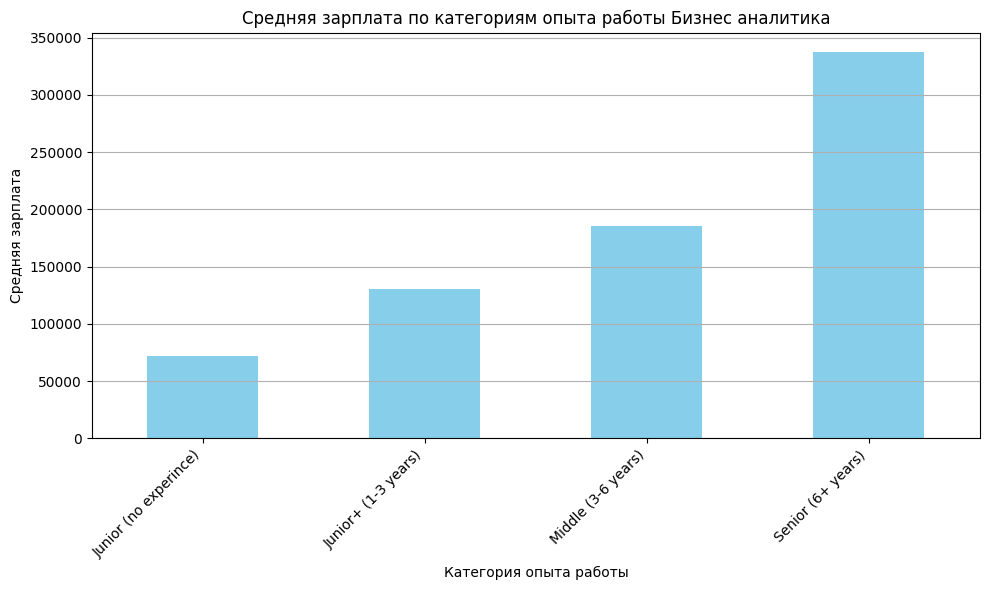

In [155]:
# Создадим функцию для определения категории опыта работы
def categorize_experience(experience):
    if 'junior' in experience.lower() and 'no' not in experience.lower():
        return 'Junior+ (1-3 years)'
    elif 'middle' in experience.lower():
        return 'Middle (3-6 years)'
    elif 'junior' in experience.lower() and 'no' in experience.lower():
        return 'Junior (no experince)'
    elif 'senior' in experience.lower():
        return 'Senior (6+ years)'
    else:
        return 'Other'

# Применим функцию к столбцу 'experience' и создадим новый столбец 'experience_category'
df_ba['experience_category'] = df_ba['experience'].apply(categorize_experience)

# Сгруппируем данные по категориям опыта работы и рассчитаем средние зарплаты
mean_salary_by_experience_ba = df_ba.groupby('experience_category')[['salary_from', 'salary_to']].mean().mean(axis=1)

# Построим столбчатую диаграмму для средних зарплат по категориям опыта работы
plt.figure(figsize=(10, 6))
mean_salary_by_experience_ba.plot(kind='bar', color='skyblue')
plt.title('Средняя зарплата по категориям опыта работы Бизнес аналитика')
plt.xlabel('Категория опыта работы')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Разделим навыки из столбца key_skills_from_key_skills_field на хард и софт навыки, создадим 2 столбца soft_skills и hard_skills:**

In [156]:
# извлечем хард и софт навыки из списка
def extract_skills(skill_list):
    if pd.isna(skill_list):
        return '', ''
    hard_skills = []
    soft_skills = []
    for skill in skill_list.split(','):
        skill = skill.strip()
        if skill:
            if skill.isascii():
                hard_skills.append(skill)
            else:
                soft_skills.append(skill)
    return ', '.join(hard_skills), ', '.join(soft_skills)

# Применим функцию к столбцу с ключевыми скилами в df_ba
df_ba[['hard_skills', 'soft_skills']] = df_ba['key_skills_from_key_skills_field'].apply(extract_skills).apply(pd.Series)

display(df_ba.head(5))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,experience_category,hard_skills,soft_skills
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",Не указано,"Документация, Аналитическое мышление",Junior+ (1-3 years),"MS Visio, Business Studio, MS PowerPoint",Оптимизация бизнес-процессов
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,Не указано,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",...,рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,Отсутствует,Не указано,"Коммуникация, Документация",Middle (3-6 years),,Отсутствует
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,Не указано,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",Не указано,Документация,Junior (no experince),MS Visio,"Управление проектами, Разработка технических з..."
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,Не указано,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,Отсутствует,Не указано,Аналитическое мышление,Junior+ (1-3 years),,Отсутствует
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,Не указано,Москва,Junior+ (1-3 years),['Документация'],...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,Отсутствует,Не указано,Документация,Junior+ (1-3 years),,Отсутствует


In [157]:
# Извлечем хард и софт скиллы из списка
def extract_skills(skill_list):
    if pd.isna(skill_list):
        return '', ''
    hard_skills = []
    soft_skills = []
    for skill in skill_list.split(','):
        skill = skill.strip()
        if skill:
            if skill.isascii():
                hard_skills.append(skill)
            else:
                soft_skills.append(skill)
    return ', '.join(hard_skills), ', '.join(soft_skills)

# Применим функцию к столбцу с ключевыми скилами в df_da
df_da[['hard_skills', 'soft_skills']] = df_da['key_skills_from_key_skills_field'].apply(extract_skills).apply(pd.Series)

display(df_da.head(5))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,experience_category,hard_skills,soft_skills
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,https://hh.ru/vacancy/77320677,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),"['Бизнес-анализ', 'Анализ бизнес показателей',...",...,масштабный проект создание единый корпоративны...,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",Не указано,Документация,Middle (3-6 years),,"Финансовый анализ, Бизнес-анализ, Финансовая о..."
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,https://hh.ru/vacancy/77963716,Открытая,Яковлев,Не указано,Москва,Junior+ (1-3 years),"['Apache, PHP, MySQL', 'Ethernet IEEE 802.3', ...",...,системный аналитик инф взаимодействие абонент ...,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",Не указано,Отсутствует,Junior+ (1-3 years),"ICD, AFDX, Excel, Python, Ethernet IEEE 802.3,...","макросы VBA, Знание основ БД, английский язык ..."
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,https://hh.ru/vacancy/79889558,Открытая,МТС,"«МТС», Digital",Москва,Junior+ (1-3 years),"['Data Catalog', 'Data Governance', 'DMBOK DAM...",...,мтс мультисервисный цифровой экосистема создав...,NaN,NaN,ЗП не указана,"Data Catalog, DMBOK DAMA, Business Glossary, D...",Не указано,Отсутствует,Junior+ (1-3 years),"Data Catalog, DMBOK DAMA, Business Glossary, D...",Анализ данных
3,82901165,DATA-аналитик,2024-03-25 10:33:57,https://hh.ru/vacancy/82901165,Открытая,ЭлРос,Не указано,Владимир,Junior+ (1-3 years),"['Spark', 'Data Analysis', 'Теория вероятносте...",...,наш преимущество аккредитовать ита компания си...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Spark,...",Не указано,Отсутствует,Junior+ (1-3 years),"Python, SQL, Spark, Hadoop, Data Analysis, Mac...","Математическая статистика, Анализ данных, Теор..."
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,https://hh.ru/vacancy/85598149,Открытая,EVYAP International Russia,Не указано,Москва,Junior+ (1-3 years),"['MS Access', 'Управление проектами', 'Olap (o...",...,evyap rus международный fmcg компания производ...,NaN,NaN,ЗП не указана,"Business Intelligence Systems, MS Excel, MS Ac...",Не указано,Документация,Junior+ (1-3 years),"Business Intelligence Systems, MS Excel, MS Ac...","Пользователь ПК, Консультирование, Управление ..."


**4. Определим наиболее желаемых кандидатов на вакансии Аналитик данных и Бизнес-аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils**

Заменим отсутствующие значения на "Отсутствует"

In [158]:
df_da['hard_skills'] = df_da['hard_skills'].replace('', 'Отсутствует')
df_da['soft_skills'] = df_da['soft_skills'].replace('', 'Отсутствует')

In [159]:
df_ba['hard_skills'] = df_ba['hard_skills'].replace('', 'Отсутствует')
df_ba['soft_skills'] = df_ba['soft_skills'].replace('', 'Отсутствует')

In [160]:
experience_levels = df_da['experience'].unique()
experience_levels = df_ba['experience'].unique()

In [161]:
# Функция для определения топ-N наиболее важных навыков
def find_top_skills(df, skill_column, n):
    # Объединение списков всех навыков для каждой строки
    all_skills = ','.join(df[skill_column].dropna()).split(',')
    # Убираем значения "отсутствует" и "не указано"
    all_skills = [skill.strip() for skill in all_skills if skill.lower() not in ['отсутствует', 'не указано']]
    # Создание Series из списка навыков и их количества
    skill_counts = pd.Series(all_skills).value_counts()
    # Вывод топ-N наиболее часто встречающихся навыков
    print(skill_counts.head(n))

# Для каждого уровня грейда
for level in experience_levels:
    print(f"Топ-5 наиболее важных hard skills для грейда {level} (Аналитик данных):")
    find_top_skills(df_da[df_da['experience'] == level], 'hard_skills', 5)
    print(f"\nТоп-5 наиболее важных hard skills для грейда {level} (Бизнес-аналитик):")
    find_top_skills(df_ba[df_ba['experience'] == level], 'hard_skills', 5)
    print(f"\nТоп-5 наиболее важных soft skills для грейда {level} (Аналитик данных):")
    find_top_skills(df_da[df_da['experience'] == level], 'soft_skills', 5)
    print(f"\nТоп-5 наиболее важных soft skills для грейда {level} (Бизнес-аналитик):")
    find_top_skills(df_ba[df_ba['experience'] == level], 'soft_skills', 5)
    print("\n" + "="*50 + "\n")


Топ-5 наиболее важных hard skills для грейда Junior+ (1-3 years) (Аналитик данных):
SQL         92
Python      64
MS Excel    28
Power BI    27
MS SQL      20
Name: count, dtype: int64

Топ-5 наиболее важных hard skills для грейда Junior+ (1-3 years) (Бизнес-аналитик):
BPMN                    94
SQL                     60
UML                     45
Atlassian Jira          32
Atlassian Confluence    25
Name: count, dtype: int64

Топ-5 наиболее важных soft skills для грейда Junior+ (1-3 years) (Аналитик данных):
Анализ данных                          50
Аналитическое мышление                 31
Работа с базами данных                 27
Работа с большим объемом информации    26
Аналитика                              25
Name: count, dtype: int64

Топ-5 наиболее важных soft skills для грейда Junior+ (1-3 years) (Бизнес-аналитик):
Бизнес-анализ                     148
Аналитическое мышление             70
Оптимизация бизнес-процессов       61
Моделирование бизнес процессов     48
Разработка 

Построим визуализации для каждой категории:

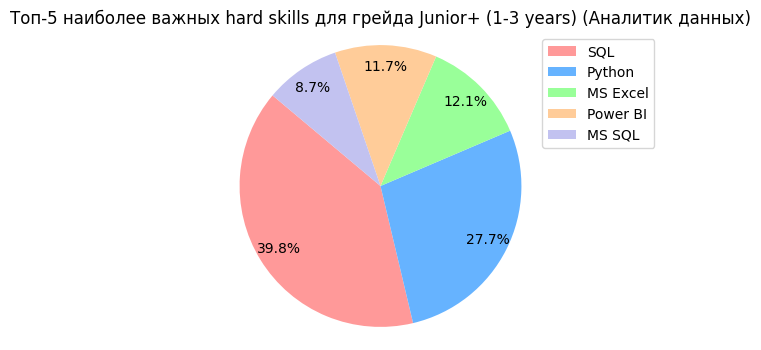

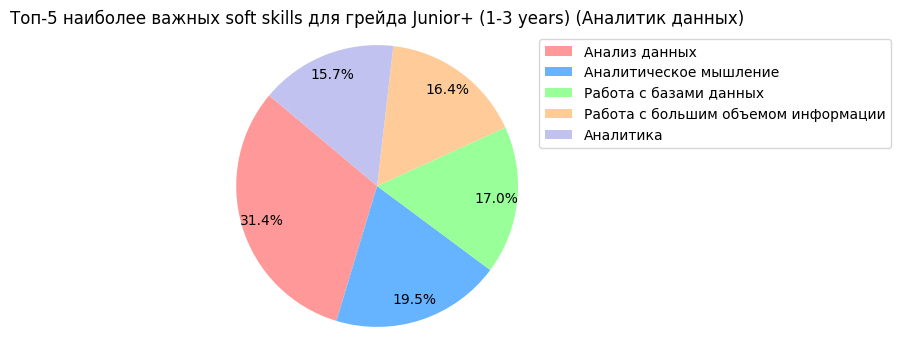

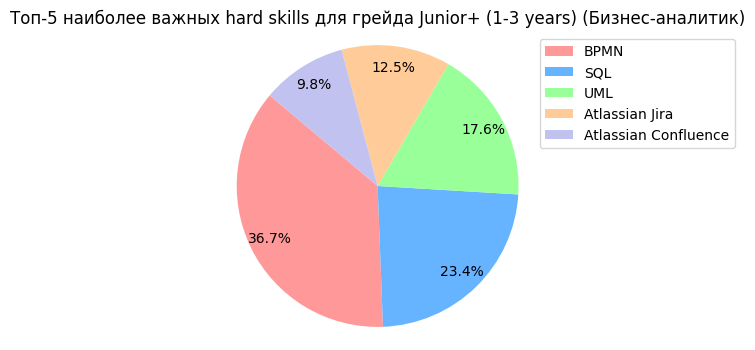

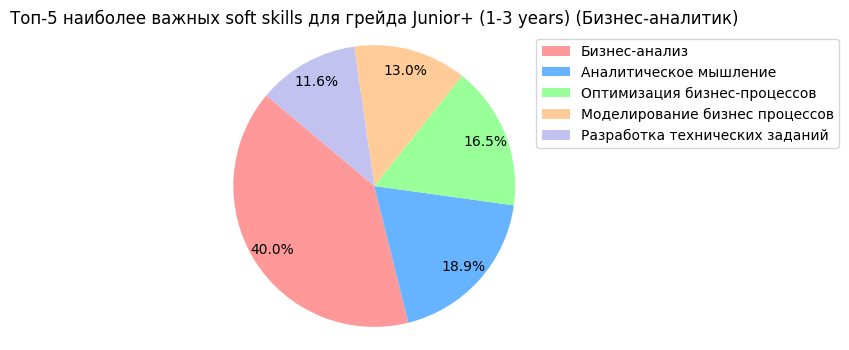

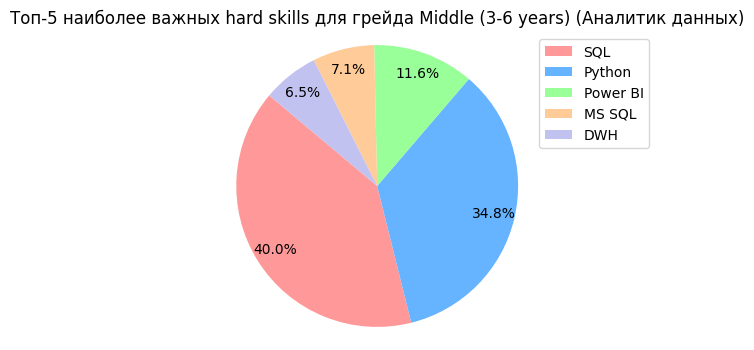

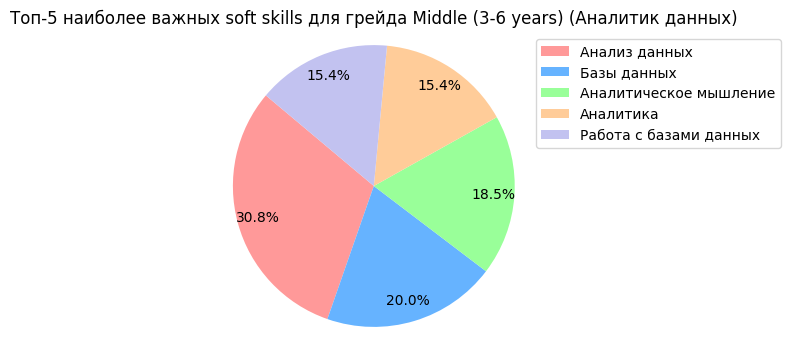

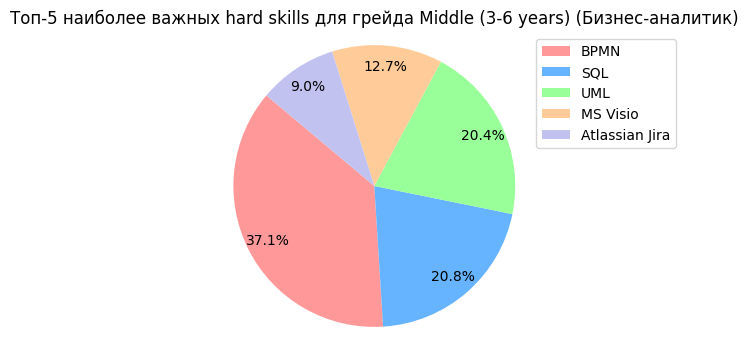

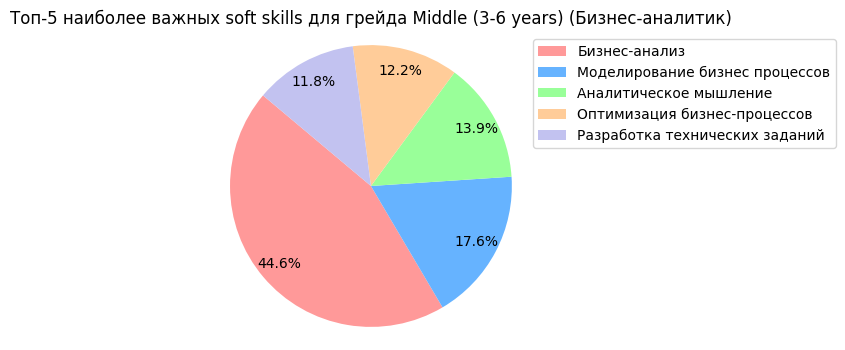

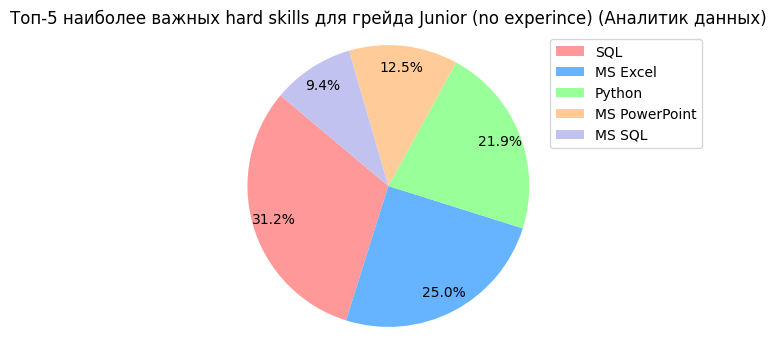

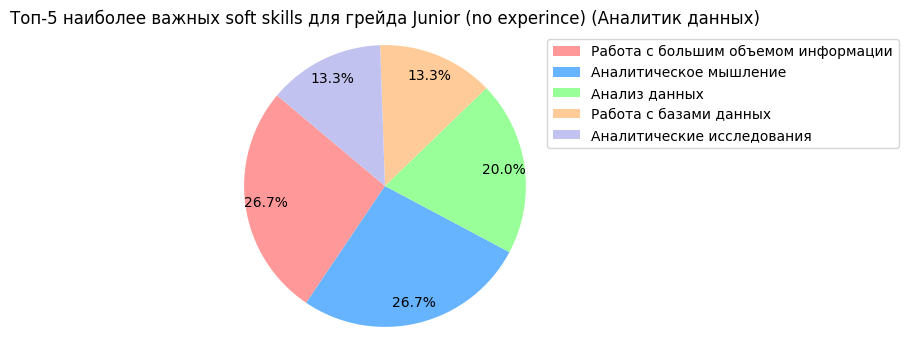

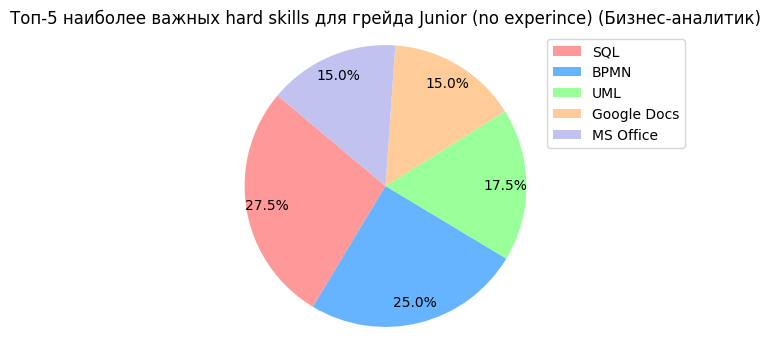

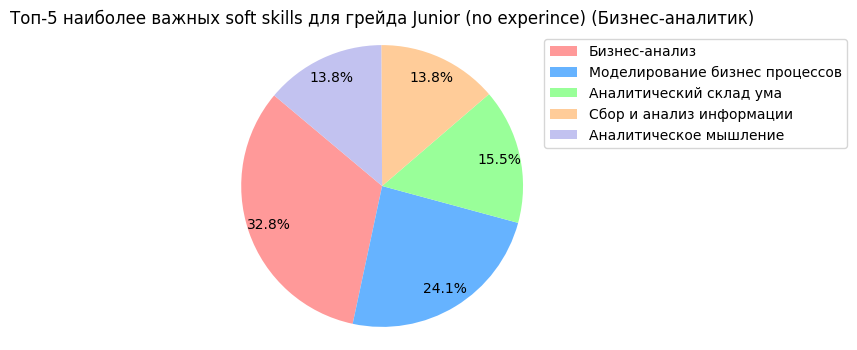

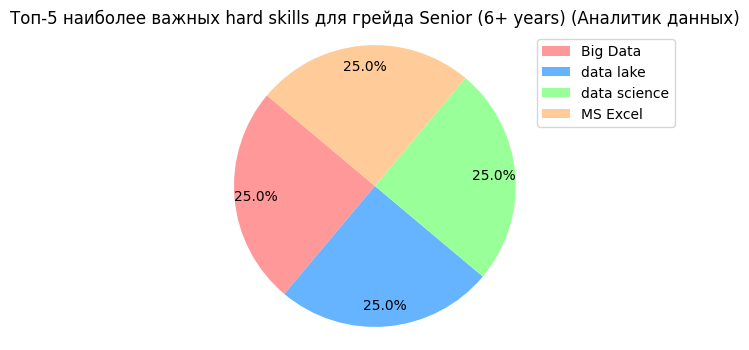

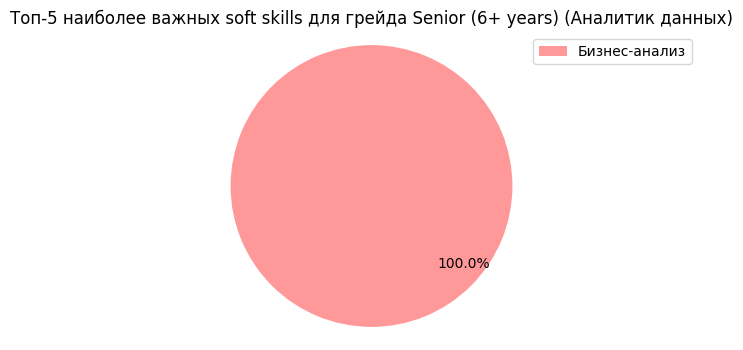

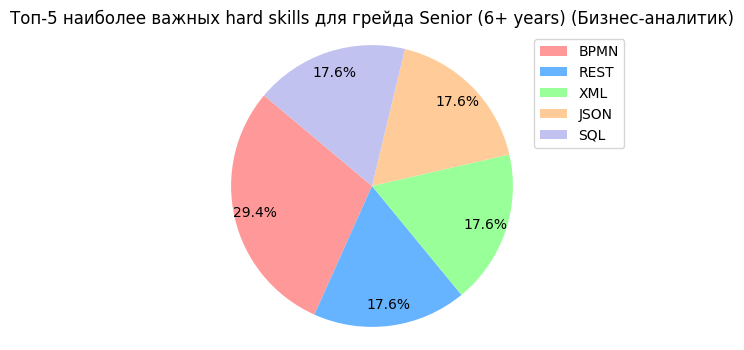

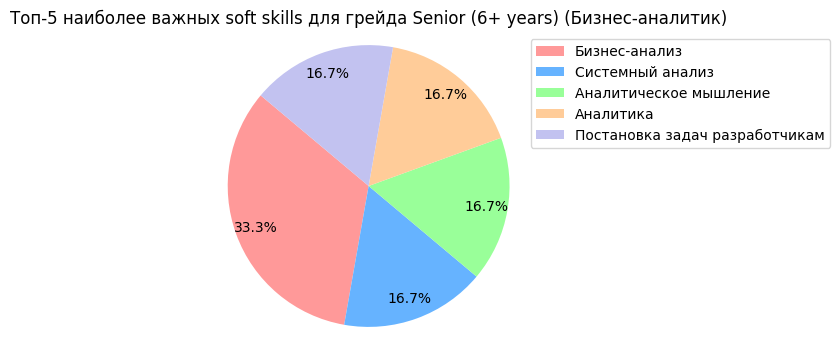

In [162]:
pastel_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb3b3']

def plot_top_skills_pie(df, skill_column, n, title):
    # Объединение списков всех навыков для каждой строки
    all_skills = ','.join(df[skill_column].dropna()).split(',')
    # Убираем значения "отсутствует" и "не указано"
    all_skills = [skill.strip() for skill in all_skills if skill.lower() not in ['отсутствует', 'не указано']]
    # Создание Series из списка навыков и их количества
    skill_counts = pd.Series(all_skills).value_counts().head(n)

    # Визуализация топ-N навыков в виде круговой диаграммы с добавлением названий навыков
    plt.figure(figsize=(4, 4))
    patches, _, _ = plt.pie(skill_counts, labels=None, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1, colors=pastel_colors)
    plt.title(title)

    # Добавление легенды с названиями навыков
    plt.legend(skill_counts.index, loc='upper left', bbox_to_anchor=(1, 1))

    plt.axis('equal')  # Это для того, чтобы круг был кругом, а не эллипсом
    plt.show()

# Для каждого уровня грейда
for level in experience_levels:
    # Визуализация топ-5 наиболее важных hard skills для грейда Аналитик данных
    plot_top_skills_pie(df_da[df_da['experience'] == level], 'hard_skills', 5, f"Топ-5 наиболее важных hard skills для грейда {level} (Аналитик данных)")
    # Визуализация топ-5 наиболее важных soft skills для грейда Аналитик данных
    plot_top_skills_pie(df_da[df_da['experience'] == level], 'soft_skills', 5, f"Топ-5 наиболее важных soft skills для грейда {level} (Аналитик данных)")

    # Визуализация топ-5 наиболее важных hard skills для грейда Бизнес-аналитик
    plot_top_skills_pie(df_ba[df_ba['experience'] == level], 'hard_skills', 5, f"Топ-5 наиболее важных hard skills для грейда {level} (Бизнес-аналитик)")
    # Визуализация топ-5 наиболее важных soft skills для грейда Бизнес-аналитик
    plot_top_skills_pie(df_ba[df_ba['experience'] == level], 'soft_skills', 5, f"Топ-5 наиболее важных soft skills для грейда {level} (Бизнес-аналитик)")

На основе предоставленных данных о наиболее важных hard и soft skills для каждого уровня грейда как для аналитиков данных, так и для бизнес-аналитиков, можно сделать следующие выводы:

Hard skills:

- Для уровня Junior (no experience) наиболее важными hard skills для аналитиков данных являются SQL, MS Excel, Python, а для бизнес-аналитиков - SQL, BPMN, UML.
- Для уровня Junior+ (1-3 years) наиболее важными hard skills для аналитиков данных остаются SQL, Python, MS Excel, а для бизнес-аналитиков - BPMN, SQL, UML.
- Для уровня Middle (3-6 years) наиболее важными hard skills для аналитиков данных и бизнес-аналитиков также остаются SQL и BPMN.

Soft skills:

 - Важные soft skills для всех уровней грейда включают аналитическое мышление и работу с большим объемом информации.
 - Для аналитиков данных также важны навыки анализа данных и работы с базами данных.
 - Для бизнес-аналитиков выделяются soft skills связанные с бизнес-анализом, моделированием бизнес-процессов и сбором и анализом информации.

Общие наблюдения: Некоторые hard skills, такие как SQL, Python и MS Excel, остаются важными на протяжении всей карьеры. Soft skills, такие как аналитическое мышление и работа с данными, также остаются важными на протяжении всей карьеры, но некоторые soft skills, связанные с бизнес-анализом, могут становиться более значимыми на более продвинутых уровнях.

**Определим наиболее желаемых кандидатов на вакансии Аналитик данных и Бизнес-аналитик по опыту работы**

In [163]:
# Подсчет количества вакансий для каждой категории опыта работы в df_da
df_da_experience_counts = df_da['experience'].value_counts()

# Подсчет количества вакансий для каждой категории опыта работы в df_ba
df_ba_experience_counts = df_ba['experience'].value_counts()

# Вывод результатов для df_da
print("Наиболее востребованные категории опыта работы для Аналитиков данных:")
print(df_da_experience_counts)

# Вывод результатов для df_ba
print("\nНаиболее востребованные категории опыта работы для Бизнес-аналитиков:")
print(df_ba_experience_counts)

Наиболее востребованные категории опыта работы для Аналитиков данных:
experience
Junior+ (1-3 years)      243
Middle (3-6 years)       137
Junior (no experince)     36
Senior (6+ years)          1
Name: count, dtype: int64

Наиболее востребованные категории опыта работы для Бизнес-аналитиков:
experience
Junior+ (1-3 years)      510
Middle (3-6 years)       426
Junior (no experince)     59
Senior (6+ years)         16
Name: count, dtype: int64


Исходя из представленных данных о количестве вакансий для каждой категории опыта работы в области аналитики данных (Аналитиков данных) и бизнес-аналитики (Бизнес-аналитиков), можно сделать следующие выводы:

Для аналитиков данных:
 - Наиболее востребованной категорией опыта работы является Junior+ (1-3 years), с общим числом вакансий 243.
 - Второй по популярности уровень опыта работы - Middle (3-6 years) с 137 вакансиями.
 - Уровни Junior (no experience) и Senior (6+ years) имеют меньшее количество вакансий: 36 и 1 соответственно.

Для бизнес-аналитиков:
 - Наибольшее количество вакансий предлагается для уровня Junior+ (1-3 years) - 510 вакансий.
 - Уровень Middle (3-6 years) также востребован, с 426 вакансиями.
 - Уровни Junior (no experience) и Senior (6+ years) имеют меньшее количество вакансий: 59 и 16 соответственно.

Общие наблюдения:

Вакансии с более низким уровнем опыта (Junior и Junior+) встречаются чаще всего как для аналитиков данных, так и для бизнес-аналитиков.
Для более опытных кандидатов (Middle и Senior) количество вакансий значительно меньше, что может указывать на более жесткие требования к опыту и квалификации.

Идеальные кандидаты на должности аналитика данных и бизнес-аналитика для различных грейдов обладают следующими характеристиками:

 - Junior (без опыта):
Hard skills: Владение SQL, MS Excel, Python для аналитика данных; знание SQL, BPMN, UML для бизнес-аналитика.
Soft skills: Аналитическое мышление, способность работать с большим объемом информации.
Опыт работы: Опыт не требуется, но может быть полезным для конкурентного преимущества.
 - Junior+ (1-3 года опыта):
Hard skills: Углубление знаний в SQL, Python, MS Excel для аналитика данных; освоение BPMN, SQL, UML для бизнес-аналитика.
Soft skills: Продолжение развития аналитического мышления, способности к анализу данных.
Опыт работы: 1-3 года опыта работы, предпочтительно в аналогичной сфере.
 - Middle (3-6 лет опыта):
Hard skills: Профессиональное владение SQL и BPMN для обоих профилей; дополнительные навыки в Python и анализе данных для аналитика данных.
Soft skills: Аналитическое мышление, способность работать с большим объемом информации.
Опыт работы: 3-6 лет опыта.
 - Senior (более 6 лет опыта):
Hard skills: Глубокое знание SQL и BPMN; Python и других инструментах анализа данных для аналитика данных.
Soft skills: Аналитическое мышление, постановка задач разработчикам.
Опыт работы: Более 6 лет опыта в аналитике данных или бизнес-анализе.

**5. Определение типичного места работы для Аналитика данных и Бизнес-аналитика по: ТОП-работодателей**

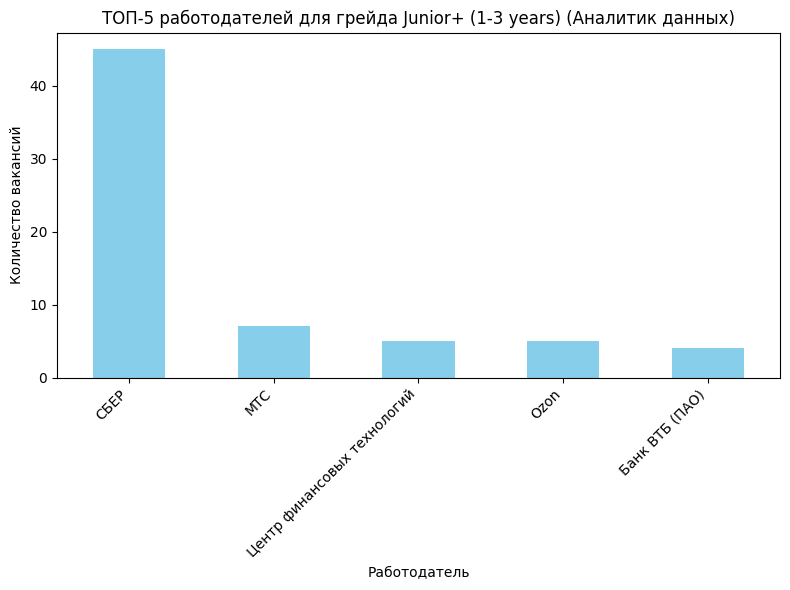

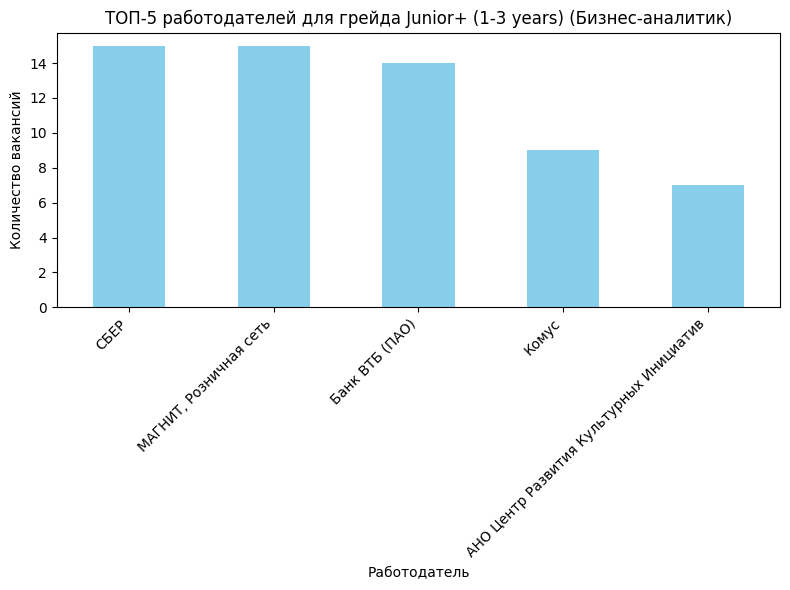

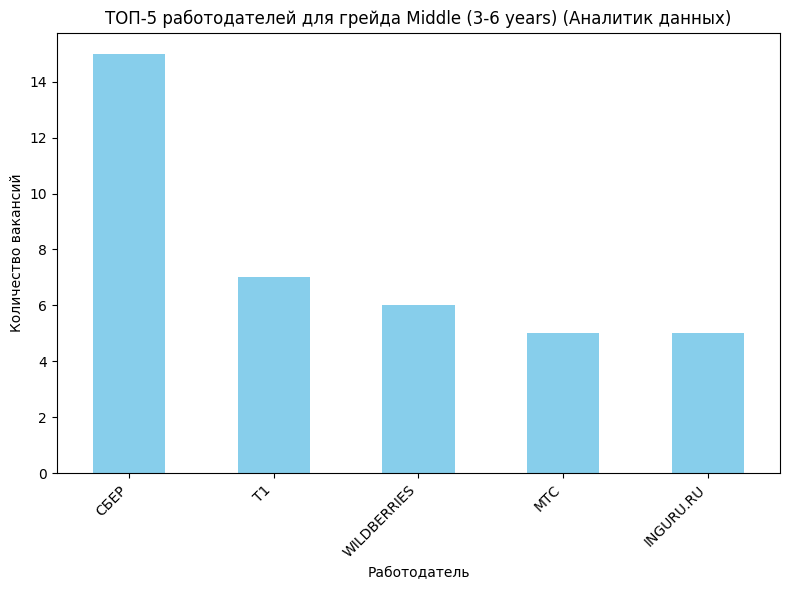

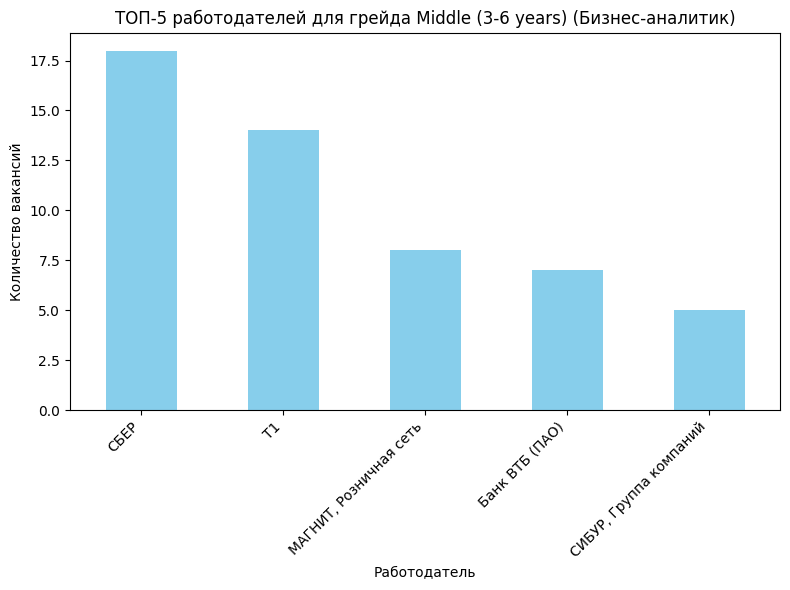

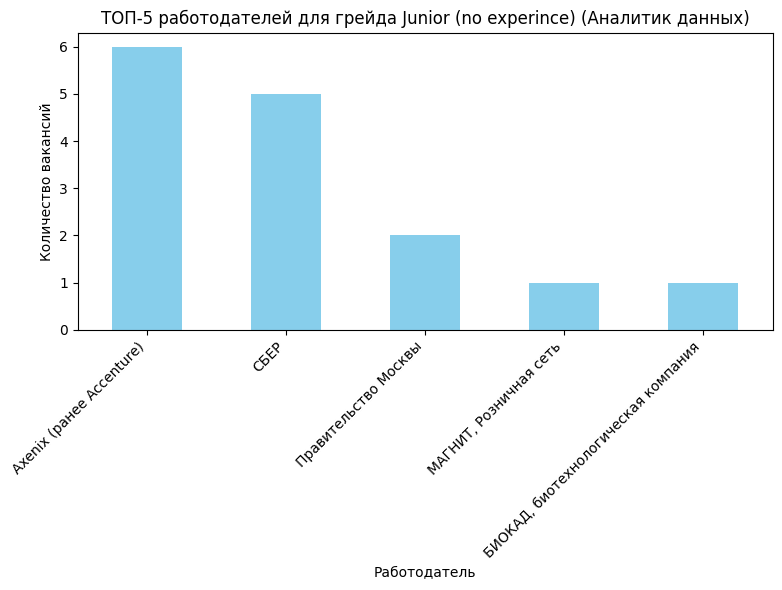

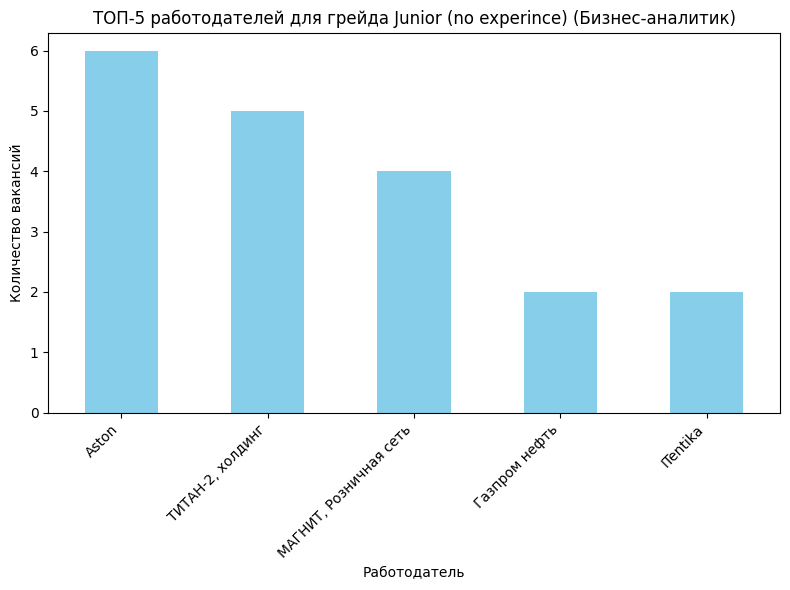

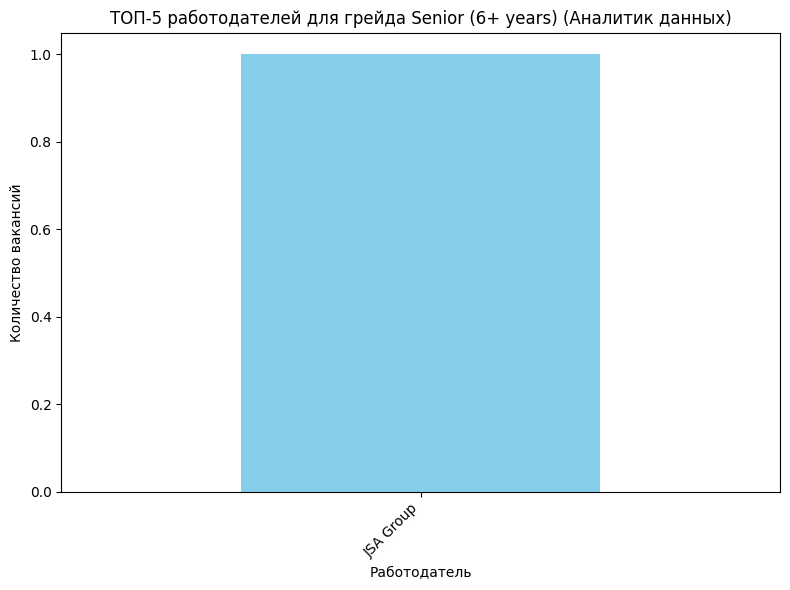

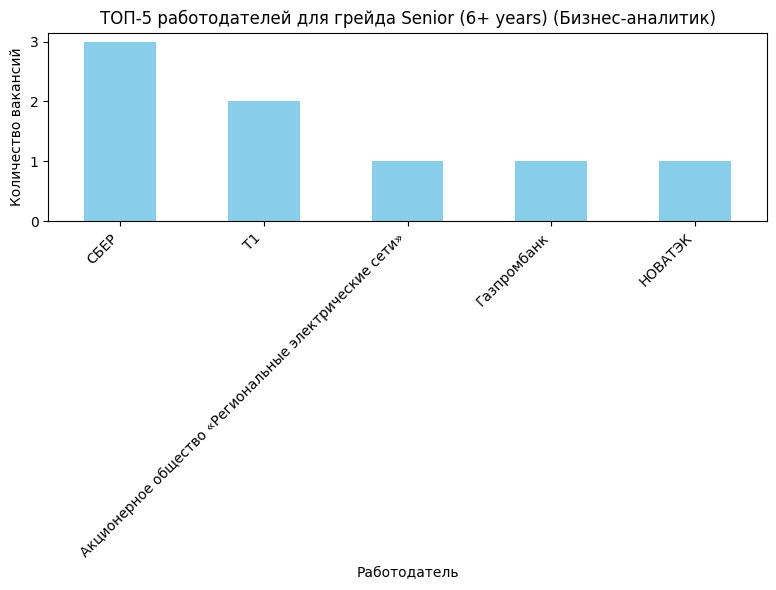

In [164]:
# Функция для визуализации ТОП-N работодателей в виде столбчатой диаграммы
def plot_top_employers(employers, grade, title):
    plt.figure(figsize=(8, 6))
    employers.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Работодатель')
    plt.ylabel('Количество вакансий')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Функция для получения ТОП-N работодателей для каждого уровня грейда
def top_employers_by_grade(df, grade, n=5):
    # Фильтрация данных по уровню грейда
    filtered_df = df[df['experience'] == grade]
    # Группировка по работоделям и подсчет количества вакансий
    top_employers = filtered_df['employer'].value_counts().head(n)
    return top_employers

# Для каждого грейда
for grade in experience_levels:
    # Получение ТОП-5 работодателей для каждой категории
    top_employers_da = top_employers_by_grade(df_da, grade, n=5)
    top_employers_ba = top_employers_by_grade(df_ba, grade, n=5)

    # Визуализация ТОП-5 работодателей для аналитика данных
    plot_top_employers(top_employers_da, grade, f"ТОП-5 работодателей для грейда {grade} (Аналитик данных)")

    # Визуализация ТОП-5 работодателей для бизнес-аналитика
    plot_top_employers(top_employers_ba, grade, f"ТОП-5 работодателей для грейда {grade} (Бизнес-аналитик)")



Исходя из предоставленных данных о ТОП-5 работодателях для каждого уровня грейда аналитика данных и бизнес-аналитика, можно сделать следующие выводы:

ТОП-5 работодателей для грейда Junior (no experience):
 - Аналитик данных: В топе находятся компании, такие как Axenix, СБЕР и Правительство Москвы.
 - Бизнес-аналитик: Среди работодателей преобладают компании Aston и ТИТАН-2, холдинг.

ТОП-5 работодателей для грейда Junior+ (1-3 years):

 - Аналитик данных: СБЕР является крупнейшим работодателем для данной категории греда.
 - Бизнес-аналитик: Также СБЕР находится в топе, а также компании МАГНИТ, Банк ВТБ и Комус.

ТОП-5 работодателей для грейда Middle (3-6 years):
 - Аналитик данных: СБЕР снова остается на первом месте в этой категории, а также присутствуют компании Т1 и WILDBERRIES.
 - Бизнес-аналитик: Также СБЕР занимает лидирующее положение, а также в списке присутствуют Т1, МАГНИТ и Банк ВТБ.

ТОП-5 работодателей для грейда Senior (6+ years):
 - Аналитик данных: JSA Group - единственный работодатель, указанный в данной категории.
 - Бизнес-аналитик: Среди работодателей для этой категории присутствуют СБЕР, Т1, Акционерное общество «Региональные электрические сети», Газпромбанк и НОВАТЭК.

Общий вывод: СБЕР чассто встречается в топе работодателей для различных уровней грейда как для аналитиков данных, так и для бизнес-аналитиков. Некоторые другие компании, такие как МАГНИТ и Т1, также встречаются в топах для различных уровней грейда.

**Определение типичного места работы для Аналитика данных и Бизнес-аналитика по  зарплате**

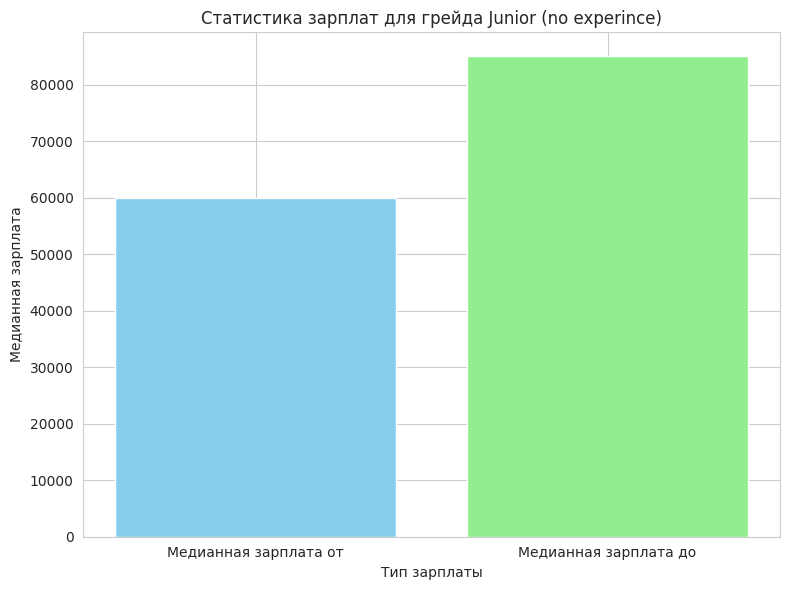

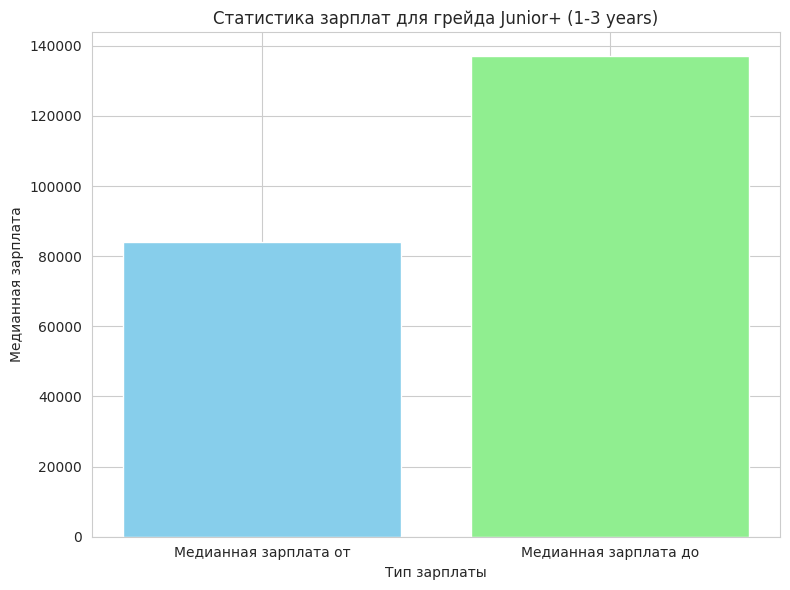

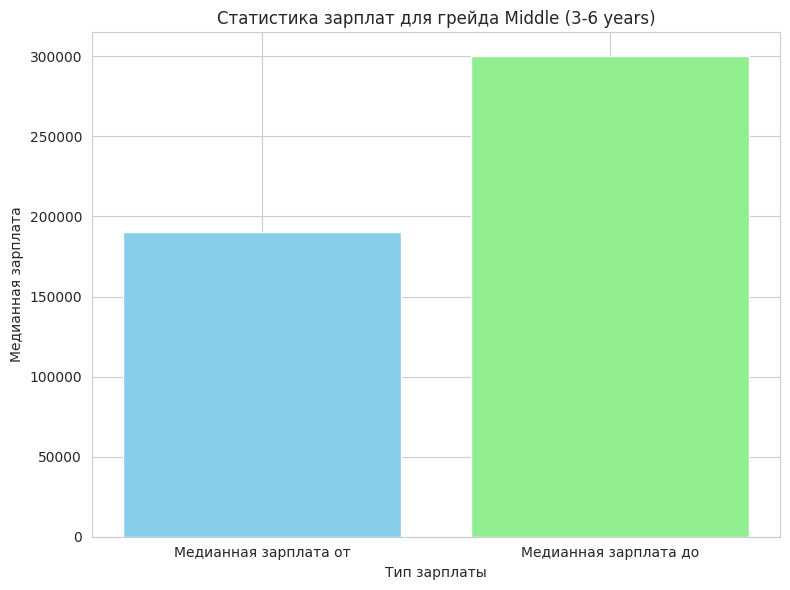

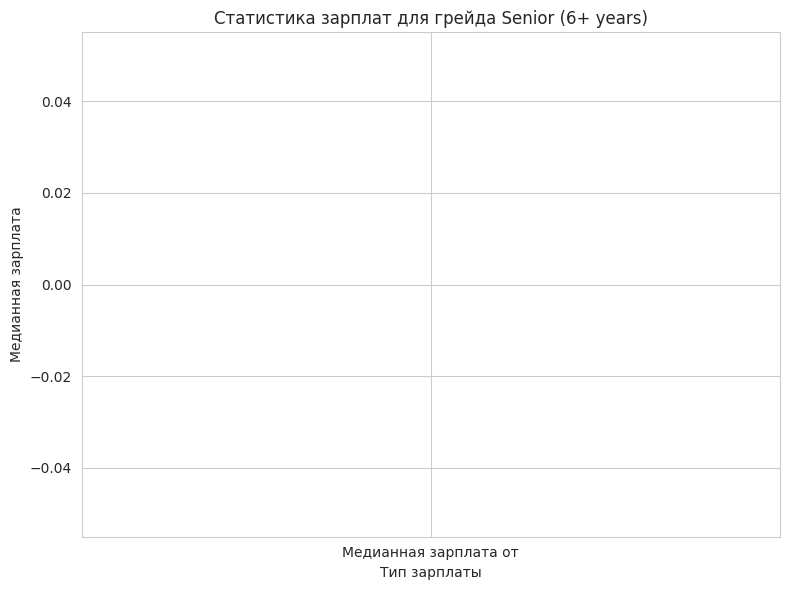

In [219]:
def plot_salary_stats(grade, salary_stats):
    # Получение статистик зарплат для данного грейда
    median_salary_from = salary_stats.loc[grade, ('salary_from', 'median')]
    median_salary_to = salary_stats.loc[grade, ('salary_to', 'median')]

    # Создание графика
    plt.figure(figsize=(8, 6))

    # Построение столбчатой диаграммы
    plt.bar(['Медианная зарплата от', 'Медианная зарплата до'], [median_salary_from, median_salary_to], color=['skyblue', 'lightgreen'])

    # Добавление заголовка и меток осей
    plt.title(f'Статистика зарплат для грейда {grade}')
    plt.xlabel('Тип зарплаты')
    plt.ylabel('Медианная зарплата')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Грейды, для которых нужно построить графики
grades = ['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)']

for grade in grades:
    plot_salary_stats(grade, salary_stats_da_by_grade)


Из анализа статистики зарплат для аналитиков данных по грейдам можно сделать следующие выводы:

Зарплаты значительно увеличиваются с уровнем опыта:
 - Для грейда Junior (без опыта) медианная зарплата от 60000 до 85000.
 - Для грейда Junior+ (1-3 года опыта) медианная зарплата от 84000 до 137000.
 - Для грейда Middle (3-6 лет опыта) медианная зарплата от 190000 до 300000.
 - Для грейда Senior (более 6 лет опыта) статистики по зарплатам отсутствуют, что может свидетельствовать о большей вариативности или отсутствии однозначных средних значений для данного уровня опыта.

**Определение типичного места работы для Аналитика данных и Бизнес-аналитика по  типу занятости**

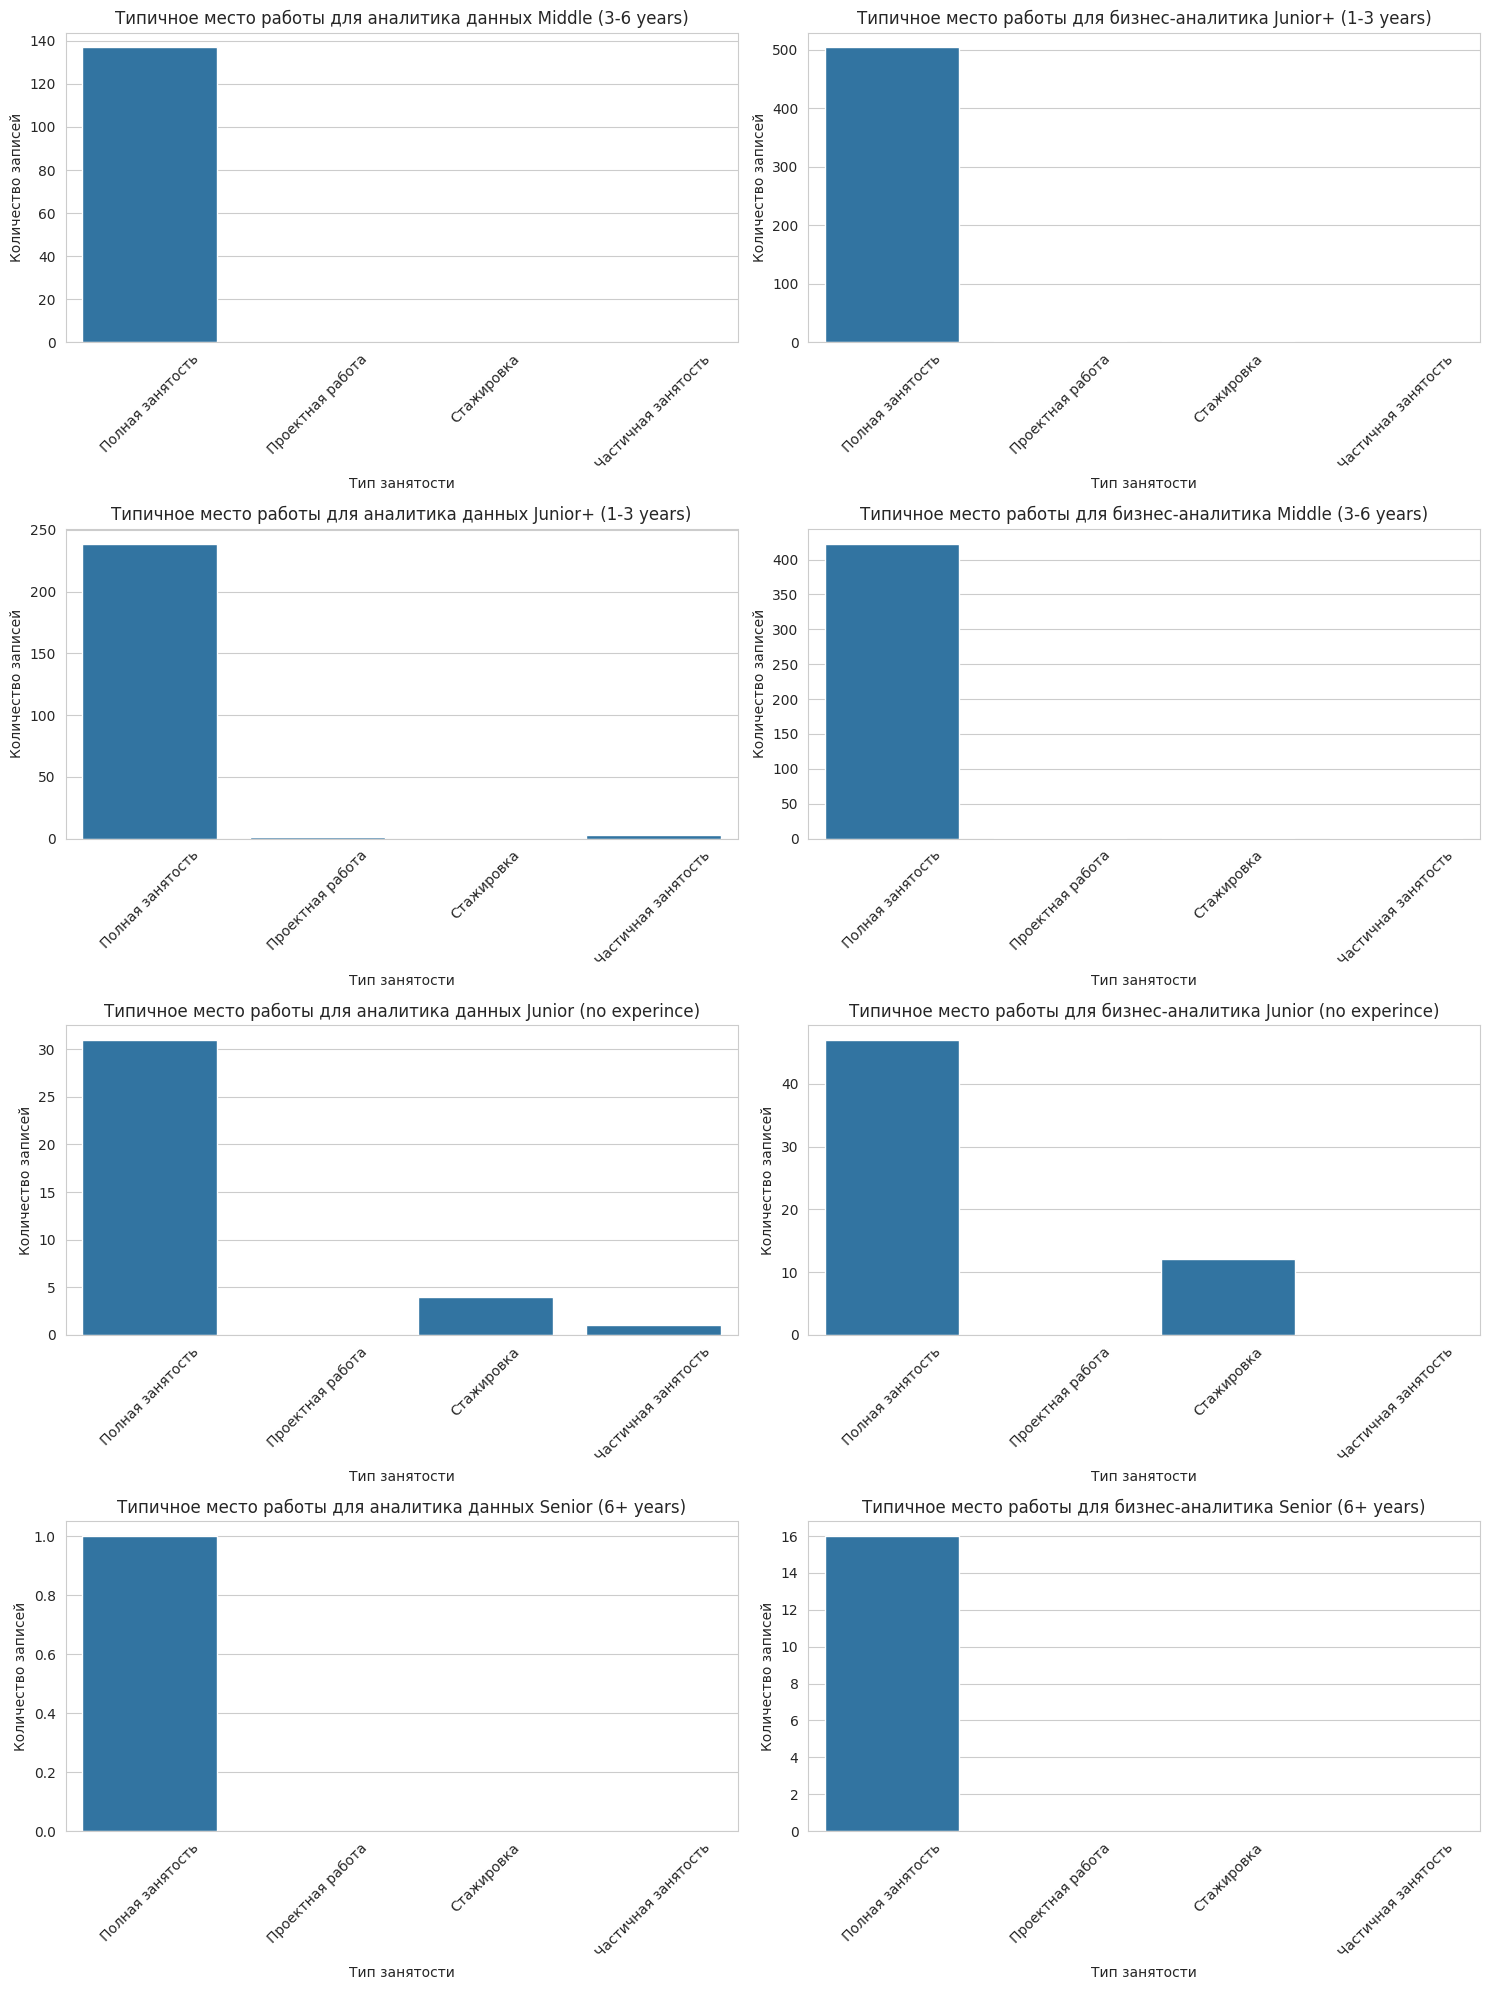

In [215]:
sns.set_style("whitegrid")

# Функция для визуализации типичного места работы по типу занятости для каждого грейда
def plot_typical_employment(df_da, df_ba):
    # Создание фигуры и осей для графика
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
    fig.subplots_adjust(hspace=0.5)

    # Уникальные значения грейда для аналитиков данных
    grades_da = df_da['experience'].unique()

    # Цикл по каждому грейду для аналитиков данных
    for i, grade_da in enumerate(grades_da):
        # Выбор данных для текущего грейда для аналитиков данных
        grade_data_da = df_da[df_da['experience'] == grade_da]

        # Построение столбчатой диаграммы для типа занятости для аналитиков данных
        ax = axes[i, 0]
        sns.countplot(x='employment', data=grade_data_da, ax=ax)
        ax.set_title(f"Типичное место работы для аналитика данных {grade_da}")
        ax.set_xlabel("Тип занятости")
        ax.set_ylabel("Количество записей")
        ax.tick_params(axis='x', rotation=45)

    # Уникальные значения грейда для бизнес-аналитиков
    grades_ba = df_ba['experience'].unique()

    # Цикл по каждому грейду для бизнес-аналитиков
    for i, grade_ba in enumerate(grades_ba):
        # Выбор данных для текущего грейда для бизнес-аналитиков
        grade_data_ba = df_ba[df_ba['experience'] == grade_ba]

        # Построение столбчатой диаграммы для типа занятости для бизнес-аналалитиков
        ax = axes[i, 1]
        sns.countplot(x='employment', data=grade_data_ba, ax=ax)
        ax.set_title(f"Типичное место работы для бизнес-аналитика {grade_ba}")
        ax.set_xlabel("Тип занятости")
        ax.set_ylabel("Количество записей")
        ax.tick_params(axis='x', rotation=45)

    # Отображение графика
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
plot_typical_employment(df_da, df_ba)


Для всех грейдов наиболее типичным местом работы является полная занятость

**Определение типичного места работы для Аналитика данных и Бизнес-аналитика по  графику работы:**

Типичное место работы для аналитика данных Middle (3-6 years):


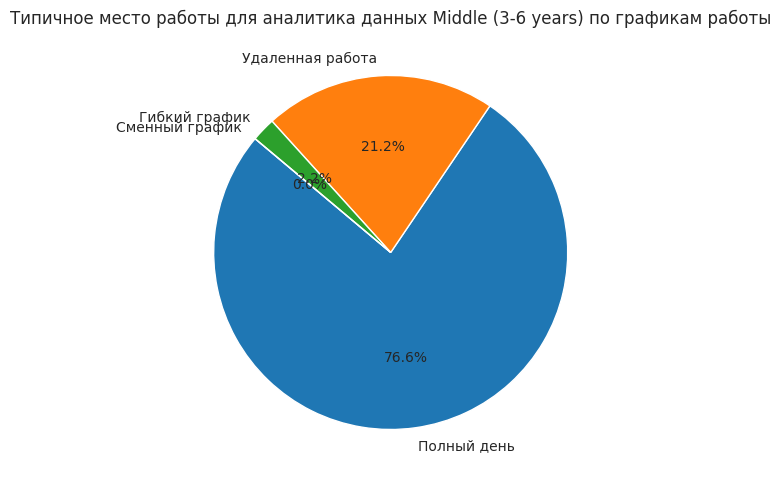


Типичное место работы для аналитика данных Junior+ (1-3 years):


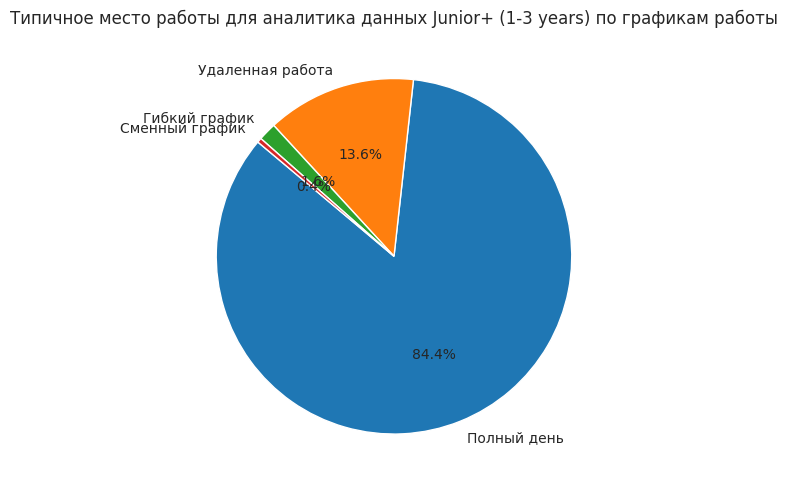


Типичное место работы для аналитика данных Junior (no experince):


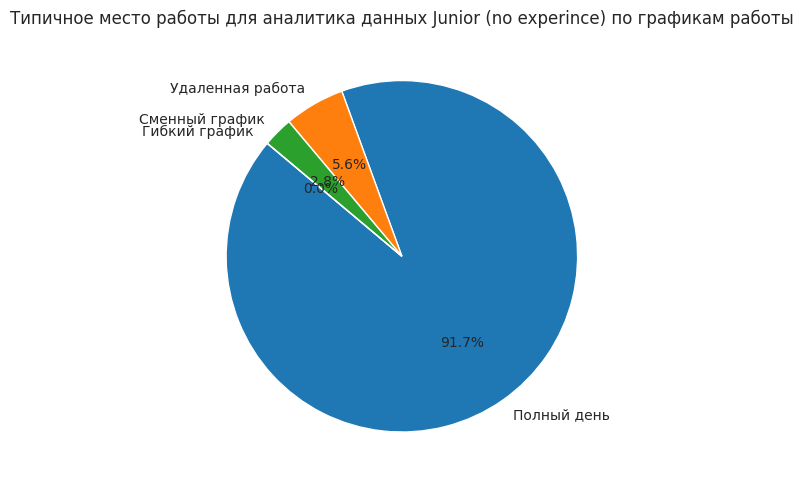


Типичное место работы для аналитика данных Senior (6+ years):


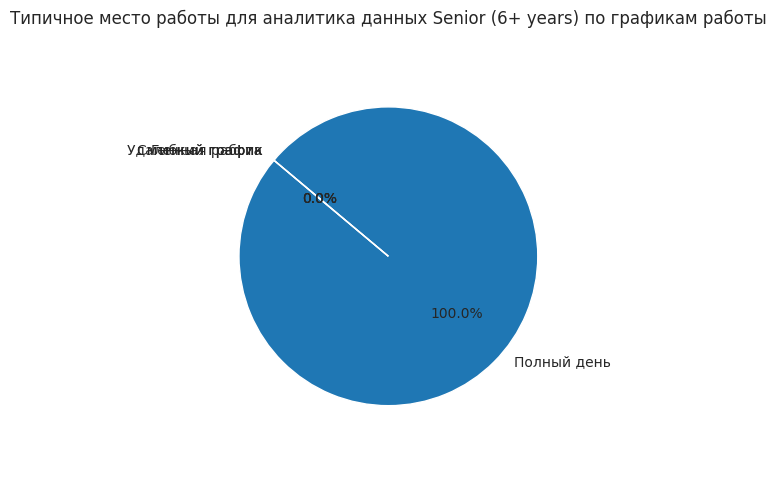


Типичное место работы для бизнес-аналитика Junior+ (1-3 years):


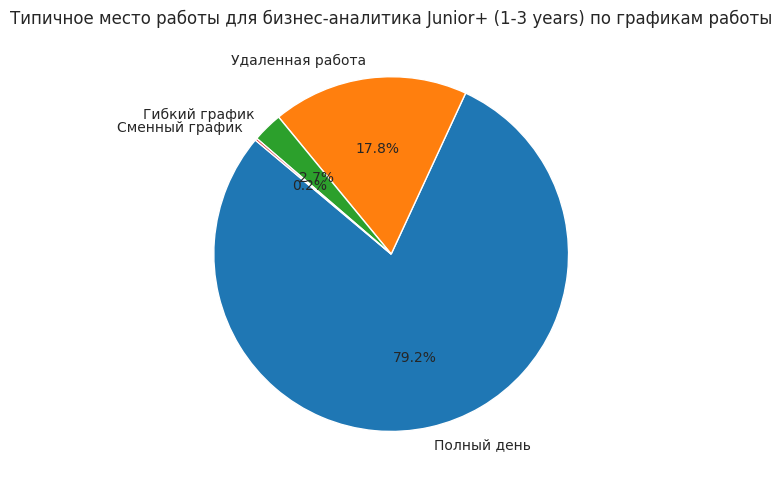


Типичное место работы для бизнес-аналитика Middle (3-6 years):


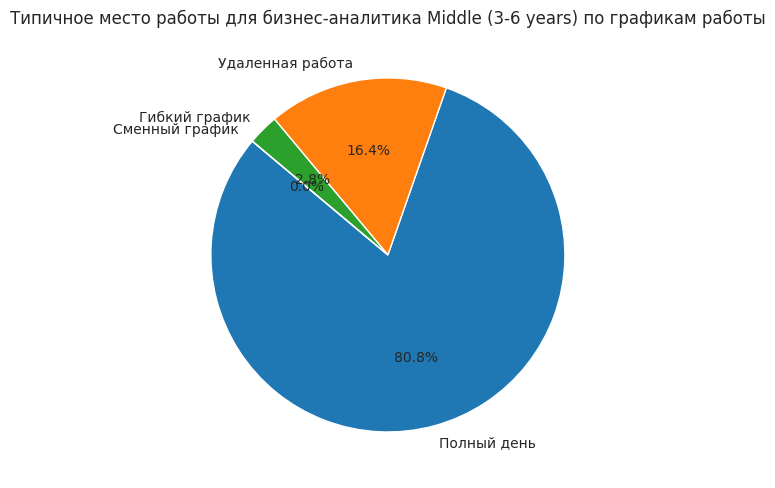


Типичное место работы для бизнес-аналитика Junior (no experince):


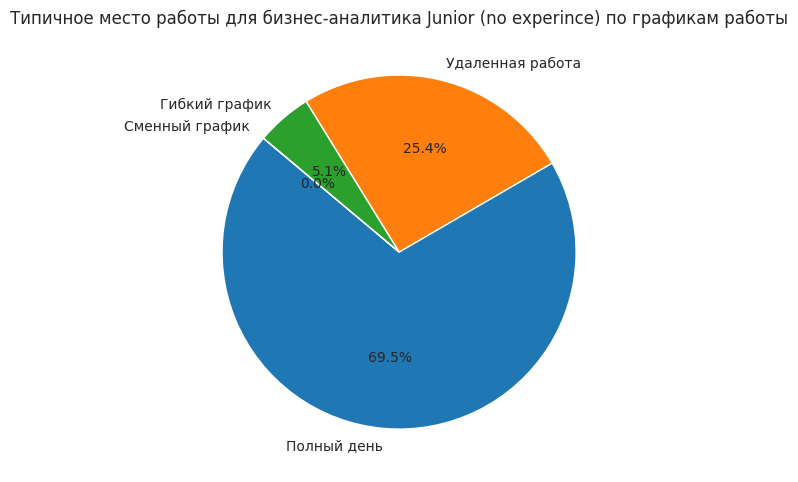


Типичное место работы для бизнес-аналитика Senior (6+ years):


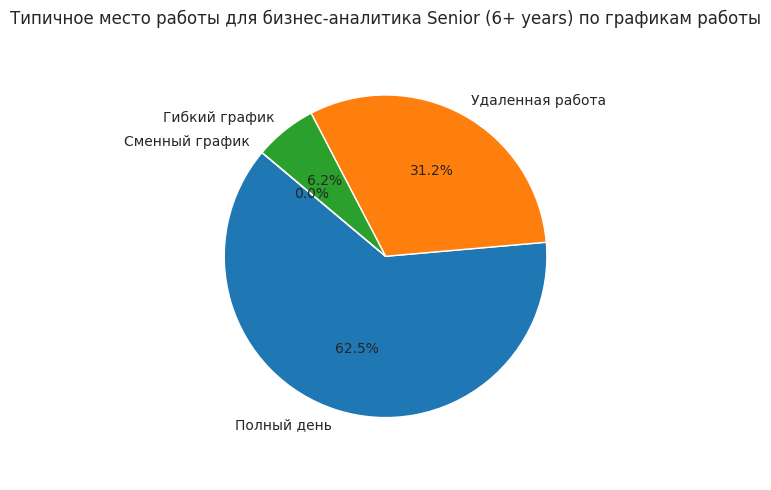

In [208]:
def typical_employment_by_grade_and_schedule(df_da, df_ba):
    # Уникальные значения грейда для аналитиков данных
    grades_da = df_da['experience'].unique()

    for grade in grades_da:
        print(f"Типичное место работы для аналитика данных {grade}:")

        # Фильтрация данных по грейду для аналитиков данных
        df_grade_da = df_da[df_da['experience'] == grade]

        # Получение количества записей для каждого графика работы для аналитиков данных
        schedule_counts_da = df_grade_da['schedule'].value_counts()

        # Визуализация для аналитиков данных
        plt.figure(figsize=(5, 5))
        plt.pie(schedule_counts_da, labels=schedule_counts_da.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Типичное место работы для аналитика данных {grade} по графикам работы")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.tight_layout()
        plt.show()
        print()

    # Уникальные значения грейда для бизнес-аналитиков
    grades_ba = df_ba['experience'].unique()

    for grade in grades_ba:
        print(f"Типичное место работы для бизнес-аналитика {grade}:")

        # Фильтрация данных по грейду для бизнес-аналитиков
        df_grade_ba = df_ba[df_ba['experience'] == grade]

        # Получение количества записей для каждого графика работы для бизнес-аналитиков
        schedule_counts_ba = df_grade_ba['schedule'].value_counts()

        # Визуализация для бизнес-аналитиков
        plt.figure(figsize=(5, 5))
        plt.pie(schedule_counts_ba, labels=schedule_counts_ba.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Типичное место работы для бизнес-аналитика {grade} по графикам работы")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.tight_layout()
        plt.show()
        print()

# Вызов функции для анализа для датафреймов df_da и df_ba
typical_employment_by_grade_and_schedule(df_da, df_ba)


Для большинства аналитиков данных и бизнес-аналитиков наиболее типичным является график работы "Полный день", но ткже можно отметить, что у бизнес-аналитиков с опытом работы от 1 до 3 лет (Junior+) и отсутствием опыта (Junior) график "Удаленная работа" имеет значительное присутствие, что, вероятно, отражает современные тенденции работы удаленно.

**Выводы и рекомендации**

В процессе выполнения анализа данных выявлены следующие проблемы и ошибки в исходных данных:
- Пропуски в данных: Обнаружены значительные пропуски в столбцах slary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description
- для явного обозначения отсутствие данных в столбцах salary_from и salary_to были заменены нулевые значения на NaN
- Отдел: Пропущенные значения заполнили значением "Не указано", чтобы сохранить информацию о том, что отделы не были указаны в объявлении о вакансии.
- Навыки: Пропущенные значения заполнили значением "Не указано".
- Преобразовали столбцы 'type', 'area', 'experience', 'employment' и 'schedule' в категориальные типы данных для обеих таблиц.
- дубликатов обнаружено не было.
- Разделили навыки из столбца key_skills_from_key_skills_field на хард и софт навыки, создали 2 новых столбца soft_skills и hard_skills.

Исходя из анализа распределения зарплат:
- Для вакансий Аналитик данных(DA):

Средняя начальная зарплата составляет примерно 103258 тысяч, средняя максимальная - примерно 151778 тысяч.
Минимальные значения начальной и максимальной зарплат составляют составляют 30 тысяч и 40 тысяч соответственно, в то время как максимальные зарплаты достигают 327.25 тысяч для начальной и 467.5 тысяч для максимальной.
Максимальные значения начальной и максимальной зарплат составляют 327.25 тысяч и и 467.5 тысяч соответственно.
Значения квартилей (25%, 50%, 75%) для обоих столбцов имеют одинаковые значения, что может свидетельствовать о том, что большинство значений находятся в диапазоне от 100 до 150 тысяч.

- Для вакансий Бизнес-аналитика (BA):

Средняя начальная зарплата составляет примерно 92944.93 тыс. руб., средняя максимальная - примерно 200500.65 тыс. руб.
Минимальные значения начальной и максимальной зарплат составляют 28940 и 36175 тыс. руб. соответственно.
Максимальные значения начальной и максимальной зарплат составляют 350000 и 400000 тыс. руб. соответственно.
Исходя из этой информации, можно сделать вывод о том, что в среднем зарплата для вакансий Бизнес-аналитика (BA) выше, чем для вакансий Аналитика данных (DA). Однако разброс зарплаты также выше, что может указывать на большую вариабельность предложений по зарплате в данной категории вакансий.

На основе предоставленных данных о наиболее важных hard и soft skills для каждого уровня грейда как для аналитиков данных, так и для бизнес-аналитиков, можно сделать следующие выводы:

 - Hard skills:

Для уровня Junior (no experience) наиболее важными hard skills для аналитиков данных являются SQL, MS Excel, Python, а для бизнес-аналитиков - SQL, BPMN, UML.
Для уровня Junior+ (1-3 years) наиболее важными hard skills для аналитиков данных остаются SQL, Python, MS Excel, а для бизнес-аналитиков - BPMN, SQL, UML.
Для уровня Middle (3-6 years) наиболее важными hard skills для аналитиков данных и бизнес-аналитиков также остаются SQL и BPMN.

 - Soft skills:

Важные soft skills для всех уровней грейда включают аналитическое мышление и работу с большим объемом информации.
Для аналитиков данных также важны навыки анализа данных и работы с базами данных.
Для бизнес-аналитиков выделяются soft skills связанные с бизнес-анализом, моделированием бизнес-процессов и сбором и анализом информации.
Общие наблюдения: Некоторые hard skills, такие как SQL, Python и MS Excel, остаются важными на протяжении всей карьеры. Soft skills, такие как аналитическое мышление и работа с данными, также остаются важными на протяжении всей карьеры, но некоторые soft skills, связанные с бизнес-анализом, могут становиться более значимыми на более продвинутых уровнях.

 - Исходя из представленных данных о количестве вакансий для каждой категории опыта работы в области аналитики данных (Аналитиков данных) и бизнес-аналитики (Бизнес-аналитиков), можно сделать следующие выводы:

Для аналитиков данных:

Наиболее востребованной категорией опыта работы является Junior+ (1-3 years), с общим числом вакансий 243.
Второй по популярности уровень опыта работы - Middle (3-6 years) с 137 вакансиями.
Уровни Junior (no experience) и Senior (6+ years) имеют меньшее количество вакансий: 36 и 1 соответственно.
Для бизнес-аналитиков:

Наибольшее количество вакансий предлагается для уровня Junior+ (1-3 years) - 510 вакансий.
Уровень Middle (3-6 years) также востребован, с 426 вакансиями.
Уровни Junior (no experience) и Senior (6+ years) имеют меньшее количество вакансий: 59 и 16 соответственно.
Общие наблюдения:

Вакансии с более низким уровнем опыта (Junior и Junior+) встречаются чаще всего как для аналитиков данных, так и для бизнес-аналитиков. Для более опытных кандидатов (Middle и Senior) количество вакансий значительно меньше, что может указывать на более жесткие требования к опыту и квалификации.

Идеальные кандидаты на должности аналитика данных и бизнес-аналитика для различных грейдов обладают следующими характеристиками:

 - Junior (без опыта):
Hard skills: Владение SQL, MS Excel, Python для аналитика данных; знание SQL, BPMN, UML для бизнес-аналитика.
Soft skills: Аналитическое мышление, способность работать с большим объемом информации.
Опыт работы: Опыт не требуется, но может быть полезным для конкурентного преимущества.
 - Junior+ (1-3 года опыта):
Hard skills: Углубление знаний в SQL, Python, MS Excel для аналитика данных; освоение BPMN, SQL, UML для бизнес-аналитика.
Soft skills: Продолжение развития аналитического мышления, способности к анализу данных.
Опыт работы: 1-3 года опыта работы, предпочтительно в аналогичной сфере.
 - Middle (3-6 лет опыта):
Hard skills: Профессиональное владение SQL и BPMN для обоих профилей; дополнительные навыки в Python и анализе данных для аналитика данных.
Soft skills: Аналитическое мышление, способность работать с большим объемом информации.
Опыт работы: 3-6 лет опыта.
 - Senior (более 6 лет опыта):
Hard skills: Глубокое знание SQL и BPMN; Python и других инструментах анализа данных для аналитика данных.
Soft skills: Аналитическое мышление, постановка задач разработчикам.
Опыт работы: Более 6 лет опыта в аналитике данных или бизнес-анализе.

Исходя из предоставленных данных о ТОП-5 работодателях для каждого уровня грейда аналитика данных и бизнес-аналитика, можно сделать следующие выводы:

 - ТОП-5 работодателей для грейда Junior (no experience):

Аналитик данных: В топе находятся компании, такие как Axenix, СБЕР и Правительство Москвы.
Бизнес-аналитик: Среди работодателей преобладают компании Aston и ТИТАН-2, холдинг.

  - ТОП-5 работодателей для грейда Junior+ (1-3 years):

Аналитик данных: СБЕР является крупнейшим работодателем для данной категории греда.
Бизнес-аналитик: Также СБЕР находится в топе, а также компании МАГНИТ, Банк ВТБ и Комус.

  - ТОП-5 работодателей для грейда Middle (3-6 years):

Аналитик данных: СБЕР снова остается на первом месте в этой категории, а также присутствуют компании Т1 и WILDBERRIES.
Бизнес-аналитик: Также СБЕР занимает лидирующее положение, а также в списке присутствуют Т1, МАГНИТ и Банк ВТБ.

  - ТОП-5 работодателей для грейда Senior (6+ years):

Аналитик данных: JSA Group - единственный работодатель, указанный в данной категории.
Бизнес-аналитик: Среди работодателей для этой категории присутствуют СБЕР, Т1, Акционерное общество «Региональные электрические сети», Газпромбанк и НОВАТЭК.
Общий вывод: СБЕР чассто встречается в топе работодателей для различных уровней грейда как для аналитиков данных, так и для бизнес-аналитиков. Некоторые другие компании, такие как МАГНИТ и Т1, также встречаются в топах для различных уровней грейда.

- Из анализа статистики зарплат для аналитиков данных по грейдам можно сделать следующие выводы:

Зарплаты значительно увеличиваются с уровнем опыта:

Для грейда Junior (без опыта) медианная зарплата от 60000 до 85000.
Для грейда Junior+ (1-3 года опыта) медианная зарплата от 84000 до 137000.
Для грейда Middle (3-6 лет опыта) медианная зарплата от 190000 до 300000.
Для грейда Senior (более 6 лет опыта) статистики по зарплатам отсутствуют, что может свидетельствовать о большей вариативности или отсутствии однозначных средних значений для данного уровня опыта.

- Для всех грейдов наиболее типичным местом работы является полная занятость
- Для большинства аналитиков данных и бизнес-аналитиков наиболее типичным является график работы "Полный день", но ткже можно отметить, что у бизнес-аналитиков с опытом работы от 1 до 3 лет (Junior+) и отсутствием опыта (Junior) график "Удаленная работа" имеет значительное присутствие, что, вероятно, отражает современные тенденции работы удаленно.

**Общий вывод рекомендации**

Исходя из предоставленных данных, можно сделать следующие общие выводы:

- Требуемые Hard Skills: Знание SQL, Python и MS Excel остается важным на всех уровнях грейда как для аналитиков данных, так и для бизнес-аналитиков. Дополнительные навыки, такие как BPMN и UML, также значимы для бизнес-аналитиков.
- Soft Skills: Аналитическое мышление, способность работать с большим объемом информации и коммуникативные навыки остаются важными для всех уровней грейда. Для бизнес-аналитиков также важны soft skills, связанные с бизнес-анализом и моделированием бизнес-процессов.
- Требуемый опыт работы: Вакансии с более низким уровнем опыта (Junior и Junior+) встречаются чаще всего как для аналитиков данных, так и для бизнес-аналитиков. Для более опытных кандидатов (Middle и Senior) количество вакансий значительно меньше.
- ТОП работодателей: СБЕР часто встречается в топе работодателей для различных уровней грейда как для аналитиков данных, так и для бизнес-аналитиков. Это может указывать на его ведущее положение на рынке и привлекательность для специалистов.
- Зарплатные ожидания: Зарплаты значительно увеличиваются с уровнем опыта. Для всех уровней грейда наиболее типичным местом работы является полная занятость, но уровни Junior и Junior+ также имеют значительное присутствие удаленной работы.

Рекомендации:

- Развивать Hard Skills: Уделить особое внимание развитию навыков владения SQL, Python и MS Excel, так как они являются ключевыми для практически всех уровней грейда. Для бизнес-аналитиков также полезно освоить BPMN и UML.
- Развивать Soft Skills: Не забывать развивать аналитическое мышление, коммуникативные навыки и способность работать с данными. Для бизнес-аналитиков важны навыки бизнес-анализа и моделирования бизнес-процессов.
- Накопить опыт работы: Вакансии с более высоким уровнем опыта обычно предполагают более высокие зарплаты и более ответственные задачи. Накопить опыт работы на начальных уровнях и постепенно развиваться.